# Assignment 4: Prediction of renewable energy generation

## Context
A friend recently had to sign a new electricity supply contract. The high prices surprised him very much and he decided to look into the electricity market. Among a lot of other information, he learned that electricity is also traded on an exchange.
He found the so-called "day-ahead" market, where electricity is traded for the next day, the most interesting. He found out that the price is almost completely determined by the supply, because the demand hardly changes at such short notice (no private person turns on less light and no industrial company stops production at such short notice). He also found out that there are already very good forecasting models for this.
The electricity supply, on the other hand, has become much more exciting in recent years. Wind turbines and large photovoltaic plants have hardly any running costs and can therefore undercut any other power plant (in the short term). However, their production strongly depends on the current weather in the area where the respective plant is located. The "conventional" power plants, which then fill the gaps to demand, determine the electricity price based on their operating costs. If you know the current oil, coal and gas prices, this is also relatively easy to predict.

Meanwhile, he is sure that you could make good money if you had a good forecast of how much electricity wind power and PV will deliver. Since he has heard that you now have some experience with data analysis, he asks you to help him and to create a forecast model that predicts the amount of electricity produced (wind & photovoltaic) based on a weather report.

As he is aware that data is needed for this, he has already obtained data:
 - From "SMARTD" (part of the regulatory authority) the installed production capacity of the different types of power plants ("energy_installed_capacity.csv") and the amount of electricity produced in reality ("energy_produced.csv").
 - Daily records from the DWD (weather service) at many measuring stations. Two files, one with the measured values (weather.csv“), one with further information (e.g. location) of the measuring stations („weatherstations.csv“).
Both sources (all four data sets) cover the period from 2016 to 2021 inclusive.

He is also sure - if the model is good enough to be worthwhile - to be able to buy sufficiently good weather forecasts, no matter in which form they would be needed exactly. So there are no limititations how the data is groupped or preprocessed.

## Assignment

Develop a forecast model, evaluate it and answer the question whether it would be useful for the intended use!
Deliver a Jupyter notebook (able to run on the server) that includes the following parts:
- Data analysis and exploration, including preparation for the model. This includes (but not limited to):
  - understanding the data (continous/categorial, range of values ...)
  - unifying the time base
  - detecting and dealing missing data point
  - possibly necessary simplifications
- Develop and evaluate a model for the forecast.
- Conclude whether (at least on the basis of the data) a meaningfully usable forecasting model could be achieved. 

Also leave drafts steps in the Jupyter notebook so that we can understand your approach.
For each decision that is relevant to the result, give a brief justification, if not clear from the context. So after a parameter analysis comparable to Task 3 in Assignment 3, no justification would of course be needed for the choice of epochs and learning rate. No justification is necessary in an "exploratory phase" either, as these form the basis for later justifications.     

**Hints:**
 - Do not underestimate the importance of the data preprocessing.
 - Remember what we talked in the different lectures, where we have talked about different ways to solve different problems. For time reasons we often had just choosen one, but that one do not necesarily be the right one in this assignment.
 - The data is quite "raw", it has some faults and/or is not in the shape you may need it and can include unnecessary information.
 - Use your "common sense" especially during the preprocessing stage.
 - You can add an arbitrarily number of additional cells of course.
 - If you want to use additional python libraries, just ask, usually we will be able to provide them.
 - If you have more than one idea to solve a problem, allow yourself to experiment a bit! There is not only one solution but at the end make very clear what is your final result.
 - For EDA/Data Preparation and ANN there are total of 60 points. Roughly equal distributed, but depending where you make some decisions there can a bit movement.
 - For EDA/Data preparation you may consider, as an example, selecting the three measured parameters and compare the distribution of the values in terms of time, location, etc.

## Exploratory Data Analysis & Data preparation (~30 Points)


In [187]:
# Importing all libraries required during this assignment
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras import Input

**Reading all csv files** 

In [188]:
data_1 = pd.read_csv('energy_installed_capacity.csv', sep = ';', index_col=0)
data_2 = pd.read_csv('energy_produced.csv', sep = ';')
data_3 = pd.read_csv('weather.csv', sep = ',')
data_4 = pd.read_csv('weatherstations.csv', sep = ',')

# Data Preprocessing 

# File 1 : 'energy_capacity.csv'

In [189]:
# converting data data into a dataframe using Pandas
df_data_energy_capa = pd.DataFrame(data_1)
df_data_energy_capa

Biomass[MW]  Water power[MW]  Wind Offshore[MW]  Wind Onshore[MW]  \
Date                                                                            
01.01.2016         6815             5514               3283             41168   
01.01.2017         7080             5446               4131             47042   
01.01.2018         7396             5300               5051             51633   
01.01.2019         7752             5281               6393             52792   
01.01.2020         7987             5268               7504             53184   
01.01.2021         8400             5112               7774             54499   

            Photovoltaics[MW]  Other renewables[MW]  Nuclear power[MW]  \
Date                                                                     
01.01.2016              38686                   545              10793   
01.01.2017              40834                   550              10793   
01.01.2018              42804                   534               9516   
01.01.2019              45299                   487               9516   
01.01.2020              48206                   454               8114   
01.01.2021              53302                   464               8114   

            Brown coal[MW]  Coal[MW]  Natural gas[MW]  Pump storage[MW]  \
Date                                                                      
01.01.2016           21062     26264            32398              8699   
01.01.2017           21262     27437            32627              8894   
01.01.2018           21275     25035            31361              8918   
01.01.2019           21205     25293            31664              9422   
01.01.2020           21067     22458            31712              9422   
01.01.2021           20487     23499            31942              9422   

            Other conventional[MW]  
Date                                
01.01.2016                    7576  
01.01.2017                    7720  
01.01.2018                    7375  
01.01.2019                    7277  
01.01.2020                    7592  
01.01.2021                    7463

### (1) Removing unncessary columns 

In [190]:
# dropping unneceesary columns from the dataframe
df_data_energy_capa = df_data_energy_capa[["Wind Offshore[MW]", "Wind Onshore[MW]", "Photovoltaics[MW]"]] 

In [191]:
df_data_energy_capa

Wind Offshore[MW]  Wind Onshore[MW]  Photovoltaics[MW]
Date                                                              
01.01.2016               3283             41168              38686
01.01.2017               4131             47042              40834
01.01.2018               5051             51633              42804
01.01.2019               6393             52792              45299
01.01.2020               7504             53184              48206
01.01.2021               7774             54499              53302

In Above dataframe, as it has only 6 rows and 3 columns in dataframe, we can clearly seen (without imposing any syntax of finding missing data) that it does not have any missing or NaN values.

### (2) Plotting a Heatmap of Dataframe for visulizing the capacity distribution

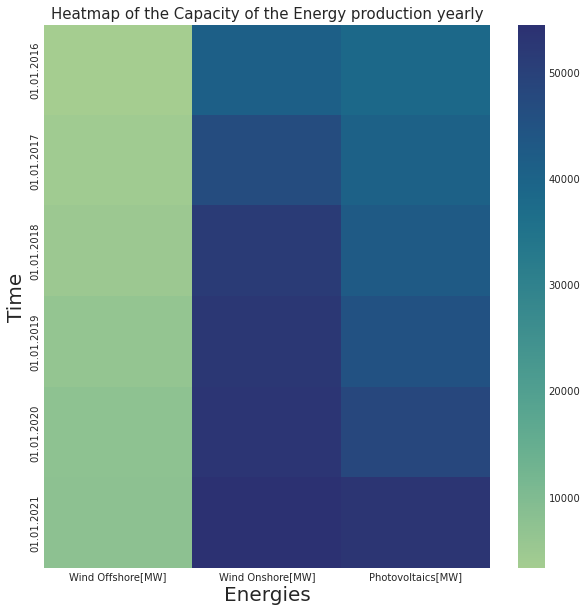

In [192]:
# Plotting a heatmap using seborn library to check the capacity increament or decreament by the year passing!!

plt.figure(figsize=(10,10))                                                            #Setting size 10 X 10 of a Heatmap 
df_heatmap = sns.heatmap(df_data_energy_capa, annot=False, cmap="crest")               #Passing Dataframe in a Heatmap syntax
plt.title('Heatmap of the Capacity of the Energy production yearly', fontsize = 15)    # title with fontsize 15
plt.xlabel('Energies', fontsize = 20)                                                  # x-axis label with fontsize 20
plt.ylabel('Time', fontsize = 20)                                                      # y-axis label with fontsize 20

plt.show()

In [193]:
# Resetting the index of dataframe to make 'Date' feature as a column
df_data_energy_capa.reset_index(inplace = True)

In [194]:
df_data_energy_capa

Date  Wind Offshore[MW]  Wind Onshore[MW]  Photovoltaics[MW]
0  01.01.2016               3283             41168              38686
1  01.01.2017               4131             47042              40834
2  01.01.2018               5051             51633              42804
3  01.01.2019               6393             52792              45299
4  01.01.2020               7504             53184              48206
5  01.01.2021               7774             54499              53302

### (3) Taking out 'Year' from Date column and making it a new column

In [195]:
# Grabbing a 'Year' from the given date in 'Date' column

df_data_energy_capa['Year'] = pd.DatetimeIndex(df_data_energy_capa['Date']).year
df_data_energy_capa

Date  Wind Offshore[MW]  Wind Onshore[MW]  Photovoltaics[MW]  Year
0  01.01.2016               3283             41168              38686  2016
1  01.01.2017               4131             47042              40834  2017
2  01.01.2018               5051             51633              42804  2018
3  01.01.2019               6393             52792              45299  2019
4  01.01.2020               7504             53184              48206  2020
5  01.01.2021               7774             54499              53302  2021

# File 2 : 'energy_produced.csv'

### STEP-1 : Reading the data of the file

In [196]:
df_energy = pd.DataFrame(data_2)
df_energy

Date   Time  Biomass[MW]  Water power[MW]  Wind Offshore[MW]  \
0       01.01.2016  00:00       1165.0            251.0                571   
1       01.01.2016  00:15       1168.0            256.0                570   
2       01.01.2016  00:30       1168.0            263.0                570   
3       01.01.2016  00:45       1165.0            268.0                565   
4       01.01.2016  01:00       1164.0            265.0                568   
...            ...    ...          ...              ...                ...   
210427  31.12.2021  22:45       1080.0            366.0               1530   
210428  31.12.2021  23:00       1079.0            365.0               1588   
210429  31.12.2021  23:15       1079.0            366.0               1595   
210430  31.12.2021  23:30       1079.0            369.0               1578   
210431  31.12.2021  23:45       1078.0            363.0               1555   

        Wind Onshore[MW]  Photovoltaics[MW]  Other renewables[MW]  \
0                   1649                  0                    46   
1                   1602                  0                    46   
2                   1569                  0                    46   
3                   1552                  0                    46   
4                   1563                  0                    46   
...                  ...                ...                   ...   
210427              6578                  0                    39   
210428              6505                  0                    39   
210429              6385                  0                    39   
210430              6384                  0                    39   
210431              6433                  0                    39   

        Nuclear power[MW]  Brown coal[MW]  Coal[MW]  Natural gas[MW]  \
0                  2671.0          3671.0      1326              482   
1                  2674.0          3683.0      1244              482   
2                  2680.0          3680.0      1163              484   
3                  2681.0          3686.0      1116              483   
4                  2685.0          3694.0      1062              484   
...                   ...             ...       ...              ...   
210427              919.0           929.0       531              663   
210428              849.0           916.0       531              665   
210429              802.0           907.0       531              671   
210430              791.0           905.0       528              665   
210431              783.0           898.0       527              660   

        Pump storage[MW]  Other conventional[MW]  
0                    123                     866  
1                    105                     879  
2                    122                     890  
3                    107                     910  
4                    207                     855  
...                  ...                     ...  
210427               213                     368  
210428               218                     373  
210429               188                     374  
210430               205                     374  
210431               199                     374  

[210432 rows x 14 columns]

### STEP-2 : Removing unneccesary columns

Since we predicting the energy values, we should only consider the "Wind Offshore[MW]", "Wind Onshore[MW]", "Photovoltaics[MW]" columns as other energies can be controlled by Human whether Renewable energies can not be directly controllable.

In [197]:
# Taking into DataFrame only necessary columns "Wind Offshore[MW]", "Wind Onshore[MW]", and "Photovoltaics[MW]"
df_energy = df_energy[["Date", "Time", "Wind Offshore[MW]", "Wind Onshore[MW]", "Photovoltaics[MW]"]] 
df_energy

Date   Time  Wind Offshore[MW]  Wind Onshore[MW]  \
0       01.01.2016  00:00                571              1649   
1       01.01.2016  00:15                570              1602   
2       01.01.2016  00:30                570              1569   
3       01.01.2016  00:45                565              1552   
4       01.01.2016  01:00                568              1563   
...            ...    ...                ...               ...   
210427  31.12.2021  22:45               1530              6578   
210428  31.12.2021  23:00               1588              6505   
210429  31.12.2021  23:15               1595              6385   
210430  31.12.2021  23:30               1578              6384   
210431  31.12.2021  23:45               1555              6433   

        Photovoltaics[MW]  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
210427                  0  
210428                  0  
210429                  0  
210430                  0  
210431                  0  

[210432 rows x 5 columns]

In [198]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210432 entries, 0 to 210431
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date               210432 non-null  object
 1   Time               210432 non-null  object
 2   Wind Offshore[MW]  210432 non-null  int64 
 3   Wind Onshore[MW]   210432 non-null  int64 
 4   Photovoltaics[MW]  210432 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 8.0+ MB


### STEP-3 : Checking for missing values

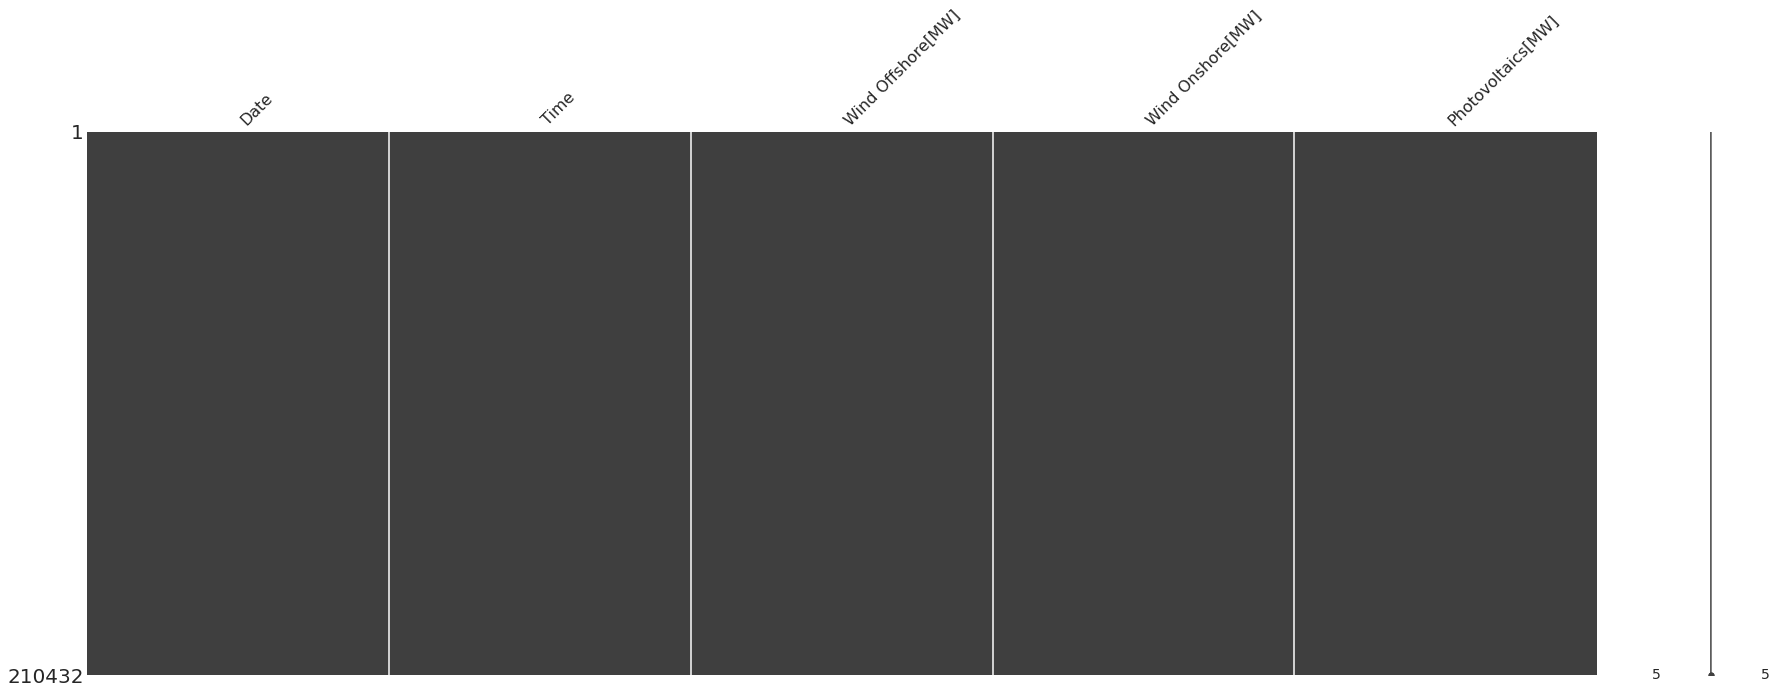

In [199]:
missingno.matrix(df_energy, figsize = (30,10))

In [200]:
# Finding total number of missing values in each column by summing up using below syntax
missing_data_energy = df_energy.isna().sum().sort_values(ascending=False)
missing_data_energy

Photovoltaics[MW]    0
Wind Onshore[MW]     0
Wind Offshore[MW]    0
Time                 0
Date                 0
dtype: int64

Above it can be seen that there is no missing values in this dataframe 

### STEP-4 : converting time to datetime and extract 'hour' value from it


In [201]:
df_energy['Time'] = pd.to_datetime(df_energy['Time'], format='%H:%M')
df_energy['hour'] = df_energy['Time'].dt.hour
df_energy['Time'] = df_energy['hour']
del df_energy['hour']
df_energy

Date  Time  Wind Offshore[MW]  Wind Onshore[MW]  \
0       01.01.2016     0                571              1649   
1       01.01.2016     0                570              1602   
2       01.01.2016     0                570              1569   
3       01.01.2016     0                565              1552   
4       01.01.2016     1                568              1563   
...            ...   ...                ...               ...   
210427  31.12.2021    22               1530              6578   
210428  31.12.2021    23               1588              6505   
210429  31.12.2021    23               1595              6385   
210430  31.12.2021    23               1578              6384   
210431  31.12.2021    23               1555              6433   

        Photovoltaics[MW]  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
210427                  0  
210428                  0  
210429                  0  
210430                  0  
210431                  0  

[210432 rows x 5 columns]

In [202]:
df_energy.describe()

Time  Wind Offshore[MW]  Wind Onshore[MW]  Photovoltaics[MW]
count  210432.000000      210432.000000     210432.000000      210432.000000
mean       11.500000         586.880284       2528.663982        1169.078805
std         6.922203         433.124061       2065.853628        1809.452747
min         0.000000           0.000000         24.000000           0.000000
25%         5.750000         198.000000        959.000000           0.000000
50%        11.500000         527.000000       1911.000000          20.000000
75%        17.250000         911.000000       3511.000000        1855.000000
max        23.000000        1801.000000      10580.000000        9096.000000

Describe() function shows that, there is a diverese dataset as we can see the wide range of different values in 'Wind Offshore[MW]'	'Wind Onshore[MW]'	and 'Photovoltaics[MW]' columns. 

### STEP-5 : Converting energy produce data into 1 hour

Since we have to make prediction for every day in the Germany, we need to convert above data day wise. Right now, energy produced data is given for every 15 minutes and values are in [MWH]. Therefore we need to do addition of every 15 minutes data to make it 'Total Energy produce in particular hour'

In [203]:
df_data_ene_1 = pd.DataFrame(df_energy.groupby(['Date','Time'])['Wind Offshore[MW]'].sum())  # Addition of every 15 minutes data from each hour for 'Wind offshore' energy

df_data_ene_2 = pd.DataFrame(df_energy.groupby(['Date','Time'])['Wind Onshore[MW]'].sum())   # Addition of every 15 minutes data from each hour for 'Wind onshore' energy

df_data_ene_3 = pd.DataFrame(df_energy.groupby(['Date','Time'])['Photovoltaics[MW]'].sum())  # Addition of every 15 minutes data from each hour for 'Photovoltaic' energy

df_data_ene_11 = df_data_ene_1.join(df_data_ene_2["Wind Onshore[MW]"])                       # Merging dataframe having columns 'Wind Offshore[MW]' and 'Wind Onshore[MW]'
df_energy = df_data_ene_11.join(df_data_ene_3["Photovoltaics[MW]"])                          # Merging dataframe having columns 'Wind Offshore[MW]', 'Wind Onshore[MW]' with 'Photovoltaics[MW]' column 

df_energy = df_energy.rename(columns={'Wind Offshore[MW]': 'Wind_Offshore[MWh]', 'Wind Onshore[MW]': 'Wind_Onshore[MW]', 
                                      'Photovoltaics[MW]': 'Photovoltaics[MW]'})             # Renaming columns
df_energy

Wind_Offshore[MWh]  Wind_Onshore[MW]  Photovoltaics[MW]
Date       Time                                                         
01.01.2016 0                   2276              6372                  0
           1                   2287              6294                  0
           2                   2229              6313                  0
           3                   2011              6430                  0
           4                   1944              6352                  0
...                             ...               ...                ...
31.12.2021 19                  5699             32843                  0
           20                  6171             30683                  0
           21                  6134             28040                  0
           22                  6044             27017                  0
           23                  6316             25707                  0

[52602 rows x 3 columns]

Above we have done addition of 4 different values that was given per 'one Hour' and then we have obtained 24 different values for 24 individual hours. Therefore we now have 24 different values of energy for one day. 

Now Below We will convert energy produce in hour into energy produce in a Day.Therefore We will do addition of 1st hour of the day till 24th Hour of the day to obtain the Energy produce [MWh] in a Day.

### STEP-6 : Converting energy produce data for every single day 

In [204]:
df_data_ene_perday1 = df_data_ene_1.groupby(['Date'])['Wind Offshore[MW]'].sum()   # Addition of data of each hour (total 24 hours) for 'Wind offshore' energy
df_data_ene_perday1 = pd.DataFrame(df_data_ene_perday1)

df_data_ene_perday2 = df_data_ene_2.groupby(['Date'])['Wind Onshore[MW]'].sum()    # Addition of data of each hour (total 24 hours) for 'Wind onshore' energy
df_data_ene_perday2 = pd.DataFrame(df_data_ene_perday2)

df_data_ene_perday3 = df_data_ene_3.groupby(['Date'])['Photovoltaics[MW]'].sum()   # Addition of data of each hour (total 24 hours) for 'Photovoltaics' energy
df_data_ene_perday3 = pd.DataFrame(df_data_ene_perday3)

df_data_ene_perday11 = df_data_ene_perday1.join(df_data_ene_perday2["Wind Onshore[MW]"])   # Merging dataframe having columns 'Wind Offshore[MW]' and 'Wind Onshore[MW]'
df_data_ene_perday22 = df_data_ene_perday11.join(df_data_ene_perday3["Photovoltaics[MW]"]) # Merging dataframe having columns 'Wind Offshore[MW]', 'Wind Onshore[MW]' with 'Photovoltaics[MW]'

df_data_ene_perday_final = df_data_ene_perday22.rename(columns={'Wind Offshore[MW]': 'Wind_Offshore[MWh]', 'Wind Onshore[MW]': 'Wind_Onshore_[MWh]', 
                                                                'Photovoltaics[MW]': 'Photovoltaics_[MWh]'})   # Renaming columns

In [205]:
df_data_ene_perday_final

Wind_Offshore[MWh]  Wind_Onshore_[MWh]  Photovoltaics_[MWh]
Date                                                                   
01.01.2016               20999               87414                18566
01.01.2017               51767              258408                35294
01.01.2018               76080              618611                29490
01.01.2019               54892              748907                10095
01.01.2020               68985              145338                50894
...                        ...                 ...                  ...
31.12.2017               85290              636637                19987
31.12.2018               55807              174854                 9332
31.12.2019               85829              362767                36568
31.12.2020               65965              247689                38504
31.12.2021              142733              666700                44431

[2192 rows x 3 columns]

In [206]:
df_data_ene_perday_final.reset_index(inplace=True)

Above it can be seen that, dataframe is ordered by the 'Year'. For example, dataframe has data of 01.01.2017 just after 01.01.2016 instead of having data of 02.01.2016. Therefore, below we have sorted those data according to the 'Day' of the 'Date'.

### STEP-7 : Sorting dataframe by Day of Date

In [207]:
df_data_ene_perday_final["Date"] = pd.to_datetime(df_data_ene_perday_final["Date"], format="%d.%m.%Y") # Converting Date intp 'datetime' format
df_data_ene_perday_final = df_data_ene_perday_final.sort_values(by=["Date"])                           # Sorting Dataframe by 'Day' from given 'Date'
df_data_ene_perday_final.reset_index(inplace=True)                                                     # Resetting index
df_data_ene_perday_final

index       Date  Wind_Offshore[MWh]  Wind_Onshore_[MWh]  \
0         0 2016-01-01               20999               87414   
1        72 2016-01-02               64280              333903   
2       144 2016-01-03               62987              345843   
3       216 2016-01-04               63665              221695   
4       288 2016-01-05               62319              145979   
...     ...        ...                 ...                 ...   
2187   1943 2021-12-27               98740              313596   
2188   2015 2021-12-28               80791              453234   
2189   2083 2021-12-29               43924              298291   
2190   2149 2021-12-30              139889              660923   
2191   2191 2021-12-31              142733              666700   

      Photovoltaics_[MWh]  
0                   18566  
1                    9411  
2                   13526  
3                   10082  
4                   12556  
...                   ...  
2187                23006  
2188                15002  
2189                15211  
2190                14202  
2191                44431  

[2192 rows x 5 columns]

### STEP-8 : Extracting a 'Year' from the 'Date' column of Dataframe

In [208]:
df_data_ene_perday_final['Year'] = pd.DatetimeIndex(df_data_ene_perday_final['Date']).year

In [209]:
df_data_ene_perday_final

index       Date  Wind_Offshore[MWh]  Wind_Onshore_[MWh]  \
0         0 2016-01-01               20999               87414   
1        72 2016-01-02               64280              333903   
2       144 2016-01-03               62987              345843   
3       216 2016-01-04               63665              221695   
4       288 2016-01-05               62319              145979   
...     ...        ...                 ...                 ...   
2187   1943 2021-12-27               98740              313596   
2188   2015 2021-12-28               80791              453234   
2189   2083 2021-12-29               43924              298291   
2190   2149 2021-12-30              139889              660923   
2191   2191 2021-12-31              142733              666700   

      Photovoltaics_[MWh]  Year  
0                   18566  2016  
1                    9411  2016  
2                   13526  2016  
3                   10082  2016  
4                   12556  2016  
...                   ...   ...  
2187                23006  2021  
2188                15002  2021  
2189                15211  2021  
2190                14202  2021  
2191                44431  2021  

[2192 rows x 6 columns]

In [210]:
df_data_ene_perday_final.dtypes

index                           int64
Date                   datetime64[ns]
Wind_Offshore[MWh]              int64
Wind_Onshore_[MWh]              int64
Photovoltaics_[MWh]             int64
Year                            int64
dtype: object

In [211]:
df_data_ene_perday_final.describe()

index  Wind_Offshore[MWh]  Wind_Onshore_[MWh]  \
count  2192.000000         2192.000000         2192.000000   
mean   1095.500000        56340.507299       242751.742245   
std     632.920216        36965.403716       182600.798412   
min       0.000000          178.000000        12793.000000   
25%     547.750000        25165.500000       106588.000000   
50%    1095.500000        52680.000000       190791.000000   
75%    1643.250000        83308.750000       326710.000000   
max    2191.000000       155398.000000       913547.000000   

       Photovoltaics_[MWh]         Year  
count          2192.000000  2192.000000  
mean         112231.565237  2018.499544  
std           73609.347345     1.708571  
min            4994.000000  2016.000000  
25%           42076.000000  2017.000000  
50%          108397.000000  2018.500000  
75%          171512.250000  2020.000000  
max          320719.000000  2021.000000

### STEP-9 : Adding values of Capacities to each Energy produce data in a Dataframe from 'energy_capacity.csv' file

In [212]:
# Merging Capacity dataframe and Energy produce dataframe by having 'Year' column as Common Column in both dataframe
df_data_ene_perday_final_capacity = df_data_ene_perday_final.merge(df_data_energy_capa, left_on = "Year", right_on = "Year")

In [213]:
df_data_ene_perday_final_capacity.rename(columns={"Wind Offshore[MW]": "wind_offca", "Wind Onshore[MW]": "wind_onca", 
                                         "Photovoltaics[MW]": "PV_ca"}, inplace=True)   # Renaming columns

In [214]:
df_data_ene_perday_final_capacity

index     Date_x  Wind_Offshore[MWh]  Wind_Onshore_[MWh]  \
0         0 2016-01-01               20999               87414   
1        72 2016-01-02               64280              333903   
2       144 2016-01-03               62987              345843   
3       216 2016-01-04               63665              221695   
4       288 2016-01-05               62319              145979   
...     ...        ...                 ...                 ...   
2187   1943 2021-12-27               98740              313596   
2188   2015 2021-12-28               80791              453234   
2189   2083 2021-12-29               43924              298291   
2190   2149 2021-12-30              139889              660923   
2191   2191 2021-12-31              142733              666700   

      Photovoltaics_[MWh]  Year      Date_y  wind_offca  wind_onca  PV_ca  
0                   18566  2016  01.01.2016        3283      41168  38686  
1                    9411  2016  01.01.2016        3283      41168  38686  
2                   13526  2016  01.01.2016        3283      41168  38686  
3                   10082  2016  01.01.2016        3283      41168  38686  
4                   12556  2016  01.01.2016        3283      41168  38686  
...                   ...   ...         ...         ...        ...    ...  
2187                23006  2021  01.01.2021        7774      54499  53302  
2188                15002  2021  01.01.2021        7774      54499  53302  
2189                15211  2021  01.01.2021        7774      54499  53302  
2190                14202  2021  01.01.2021        7774      54499  53302  
2191                44431  2021  01.01.2021        7774      54499  53302  

[2192 rows x 10 columns]

In [215]:
df_data_ene_perday_final_capacity.rename(columns={"Date_x": "Date"}, inplace=True)   # Renaming 'Date_x' column

In [216]:
# Dropping 'Year' and 'Date_y' columns as they are now onwards not necessary
df_data_ene_perday_final_capacity = df_data_ene_perday_final_capacity.drop(columns=['Year', 'Date_y'])  

In [217]:
df_data_ene_perday_final_capacity

index       Date  Wind_Offshore[MWh]  Wind_Onshore_[MWh]  \
0         0 2016-01-01               20999               87414   
1        72 2016-01-02               64280              333903   
2       144 2016-01-03               62987              345843   
3       216 2016-01-04               63665              221695   
4       288 2016-01-05               62319              145979   
...     ...        ...                 ...                 ...   
2187   1943 2021-12-27               98740              313596   
2188   2015 2021-12-28               80791              453234   
2189   2083 2021-12-29               43924              298291   
2190   2149 2021-12-30              139889              660923   
2191   2191 2021-12-31              142733              666700   

      Photovoltaics_[MWh]  wind_offca  wind_onca  PV_ca  
0                   18566        3283      41168  38686  
1                    9411        3283      41168  38686  
2                   13526        3283      41168  38686  
3                   10082        3283      41168  38686  
4                   12556        3283      41168  38686  
...                   ...         ...        ...    ...  
2187                23006        7774      54499  53302  
2188                15002        7774      54499  53302  
2189                15211        7774      54499  53302  
2190                14202        7774      54499  53302  
2191                44431        7774      54499  53302  

[2192 rows x 8 columns]

Where  
- wind_offca = Capacity value of Wind_Offshore[MWh]
- wind_onca	 = Capacity value of Wind_Onshore[MWh]
- PV_ca      = Capacity value of Photovoltaics_[MWh]   

**Now we have energy produce in one each day for full five years, therefore we have 2192 number of data, one for each day.**

# File 3 : 'Weather stations.csv'

### STEP-1: Reading Data from the file

In [218]:
df_data_wea_stations = pd.DataFrame(data_4)
df_data_wea_stations

Stations_ID               Location  geographic latitude  \
0           102  Leuchtturm Alte Weser               53.862   
1           164              Angermnde               53.032   
2           183                 Arkona               54.679   
3           232               Augsburg               48.425   
4           282                Bamberg               49.874   
..          ...                    ...                  ...   
71         5856           Fuerstenzell               48.545   
72         5871                   Hahn               49.946   
73         5906               Mannheim               49.509   
74         7341   Offenbach-Wetterpark               50.090   
75        15000         Aachen-Orsbach               50.798   

    geographic longitude  height Operator  
0                  8.127      32      DWD  
1                 13.991      54      DWD  
2                 13.434      42      DWD  
3                 10.942     461      DWD  
4                 10.921     240      DWD  
..                   ...     ...      ...  
71                13.353     476      DWD  
72                 7.264     497      DWD  
73                 8.554      96      DWD  
74                 8.786     119      DWD  
75                 6.024     231      DWD  

[76 rows x 6 columns]

### STEP-2: Removing unneccessary columns from Dataframe

In [219]:
df_data_wea_stations = df_data_wea_stations.drop(labels=['Location', 'Operator'], axis=1)

In [220]:
df_data_wea_stations

Stations_ID  geographic latitude  geographic longitude  height
0           102               53.862                 8.127      32
1           164               53.032                13.991      54
2           183               54.679                13.434      42
3           232               48.425                10.942     461
4           282               49.874                10.921     240
..          ...                  ...                   ...     ...
71         5856               48.545                13.353     476
72         5871               49.946                 7.264     497
73         5906               49.509                 8.554      96
74         7341               50.090                 8.786     119
75        15000               50.798                 6.024     231

[76 rows x 4 columns]

# File 4 : 'Weather.csv'

### STEP-1 : Reading a data file

In [221]:
df_data_weather = pd.DataFrame(data_3)
df_data_weather

Stations_ID        Date  Minimum Temperature  Average Temperature  \
0               102  2016-01-01                  4.1                  6.2   
1               164  2016-01-01                 -0.2                  0.8   
2               232  2016-01-01                  1.5                  2.9   
3               282  2016-01-01                  0.5                  1.8   
4               183  2016-01-01                  1.0                  2.4   
...             ...         ...                  ...                  ...   
164035         4271  2021-12-31                  7.6                 11.3   
164036         4625  2021-12-31                 10.5                 11.6   
164037         4177  2021-12-31                  3.8                  8.9   
164038         4887  2021-12-31                  5.4                  8.8   
164039         4336  2021-12-31                  7.2                  9.1   

        Maximum Temperature  relative humidity  Average windspeed (Beaufort)  \
0                       7.4              90.13                           6.8   
1                       1.9              98.88                           1.6   
2                       3.9              97.58                           2.0   
3                       3.7              96.21                           1.2   
4                       3.8              98.75                           2.9   
...                     ...                ...                           ...   
164035                 12.9              91.29                           6.7   
164036                 12.9              93.75                           7.1   
164037                 12.9              94.33                           2.6   
164038                 13.2              84.21                           4.7   
164039                 11.5              95.75                           3.4   

        Maximum windspeed (m/s)  sunshine duration  average cloud cover  Rain  \
0                          12.1              5.733                  NaN   NaN   
1                           5.4              0.000                  8.0   0.1   
2                           7.6              0.000                  7.8   0.0   
3                           4.5              0.000                  7.8   0.0   
4                           9.9              0.000                  7.8   0.0   
...                         ...                ...                  ...   ...   
164035                     15.5              0.000                  7.6   3.2   
164036                     16.2              0.000                  7.3   3.6   
164037                      8.1              4.167                  3.9   0.5   
164038                     11.9              5.333                  3.8   0.0   
164039                      9.1              0.000                  7.4   0.2   

        average air preassure  
0                     1019.03  
1                     1018.62  
2                      968.28  
3                      997.28  
4                     1020.08  
...                       ...  
164035                1008.99  
164036                1004.91  
164037                1010.02  
164038                 938.13  
164039                 985.73  

[164040 rows x 12 columns]

In [222]:
df_data_weather.describe()

Stations_ID  Minimum Temperature  Average Temperature  \
count  164040.000000        161605.000000        163882.000000   
mean     2987.926079             5.701489             9.686026   
std      2260.620392             6.719677             7.488754   
min       102.000000           -30.500000           -27.800000   
25%      1358.000000             0.800000             4.100000   
50%      2712.000000             5.600000             9.400000   
75%      4271.000000            11.100000            15.800000   
max     15000.000000            25.700000            32.000000   

       Maximum Temperature  relative humidity  Average windspeed (Beaufort)  \
count        161603.000000      163158.000000                 157719.000000   
mean             13.755906          77.649543                      4.197625   
std               8.804203          13.127623                      2.715856   
min             -26.300000           3.920000                      0.300000   
25%               7.000000          69.170000                      2.300000   
50%              13.300000          79.330000                      3.400000   
75%              20.600000          87.670000                      5.200000   
max              40.700000         100.000000                     30.100000   

       Maximum windspeed (m/s)  sunshine duration  average cloud cover  \
count            157874.000000      161984.000000        151798.000000   
mean                 11.162252           4.881379             5.564924   
std                   4.946136           4.554754             2.223396   
min                   1.300000           0.000000             0.000000   
25%                   7.700000           0.400000             4.300000   
50%                  10.200000           3.817000             6.300000   
75%                  13.500000           8.500000             7.400000   
max                  60.400000          16.783000             8.000000   

                Rain  average air preassure  
count  155301.000000          163471.000000  
mean        2.121797             977.480603  
std         5.051921              50.852730  
min         0.000000             677.880000  
25%         0.000000             964.990000  
50%         0.000000             993.430000  
75%         1.900000            1009.070000  
max       196.900000            1045.440000

### STEP-2 : Adding every columns of Weather stations Dataframe to Weather dataframe

Merging two dataframes 'df_data_weather' (which has weather data) and 'df_data_wea_stations' (Which has weather stations data) by having 'Station ID' as a common columns between two dataframes

In [223]:
df_data_weather = df_data_weather.merge(df_data_wea_stations, on='Stations_ID', how = 'inner')   # Merging two columns

In [224]:
df_data_weather

Stations_ID        Date  Minimum Temperature  Average Temperature  \
0               102  2016-01-01                  4.1                  6.2   
1               102  2016-01-02                 -3.5                  2.0   
2               102  2016-01-03                 -4.9                 -4.0   
3               102  2016-01-04                 -6.2                 -5.3   
4               102  2016-01-05                 -5.7                 -4.4   
...             ...         ...                  ...                  ...   
164035         3028  2021-12-27                  1.0                  3.8   
164036         3028  2021-12-28                  5.5                  7.3   
164037         3028  2021-12-29                  6.5                  8.0   
164038         3028  2021-12-30                 10.6                 12.5   
164039         3028  2021-12-31                 11.5                 13.1   

        Maximum Temperature  relative humidity  Average windspeed (Beaufort)  \
0                       7.4              90.13                           6.8   
1                       5.0              90.71                          15.6   
2                      -2.8              88.46                          16.7   
3                      -4.1              86.33                          13.1   
4                      -2.9              85.88                          13.5   
...                     ...                ...                           ...   
164035                  6.0              88.04                           2.4   
164036                  9.1              87.21                           3.3   
164037                 11.3              95.83                           3.5   
164038                 13.8              91.25                           5.6   
164039                 14.4              81.33                           5.5   

        Maximum windspeed (m/s)  sunshine duration  average cloud cover  Rain  \
0                          12.1              5.733                  NaN   NaN   
1                          22.3              0.000                  NaN   NaN   
2                          21.0              0.000                  NaN   NaN   
3                          19.0              0.000                  NaN   NaN   
4                          18.1              0.000                  NaN   NaN   
...                         ...                ...                  ...   ...   
164035                      8.2              0.100                  7.7   0.9   
164036                     16.7              0.000                  7.7   6.2   
164037                      9.4              0.000                  7.6   5.8   
164038                     13.5              0.000                  7.5   2.3   
164039                     13.1              0.517                  7.7   0.8   

        average air preassure  geographic latitude  geographic longitude  \
0                     1019.03               53.862                 8.127   
1                     1012.65               53.862                 8.127   
2                     1003.80               53.862                 8.127   
3                      990.84               53.862                 8.127   
4                      993.74               53.862                 8.127   
...                       ...                  ...                   ...   
164035                 982.83               51.785                 8.839   
164036                 976.33               51.785                 8.839   
164037                 985.91               51.785                 8.839   
164038                 995.09               51.785                 8.839   
164039                 999.30               51.785                 8.839   

        height  
0           32  
1           32  
2           32  
3           32  
4           32  
...        ...  
164035     157  
164036     157  
164037     157  
164038     157  
164039     157  

[164040 rows x 15 columns]

In [225]:
df_data_weather.columns

Index(['Stations_ID', 'Date', 'Minimum Temperature', 'Average Temperature',
       'Maximum Temperature', 'relative humidity',
       'Average windspeed (Beaufort)', 'Maximum windspeed (m/s)',
       'sunshine duration', 'average cloud cover', 'Rain',
       'average air preassure', 'geographic latitude', 'geographic longitude',
       'height'],
      dtype='object')

In [226]:
df_data_weather.describe()

Stations_ID  Minimum Temperature  Average Temperature  \
count  164040.000000        161605.000000        163882.000000   
mean     2987.926079             5.701489             9.686026   
std      2260.620392             6.719677             7.488754   
min       102.000000           -30.500000           -27.800000   
25%      1358.000000             0.800000             4.100000   
50%      2712.000000             5.600000             9.400000   
75%      4271.000000            11.100000            15.800000   
max     15000.000000            25.700000            32.000000   

       Maximum Temperature  relative humidity  Average windspeed (Beaufort)  \
count        161603.000000      163158.000000                 157719.000000   
mean             13.755906          77.649543                      4.197625   
std               8.804203          13.127623                      2.715856   
min             -26.300000           3.920000                      0.300000   
25%               7.000000          69.170000                      2.300000   
50%              13.300000          79.330000                      3.400000   
75%              20.600000          87.670000                      5.200000   
max              40.700000         100.000000                     30.100000   

       Maximum windspeed (m/s)  sunshine duration  average cloud cover  \
count            157874.000000      161984.000000        151798.000000   
mean                 11.162252           4.881379             5.564924   
std                   4.946136           4.554754             2.223396   
min                   1.300000           0.000000             0.000000   
25%                   7.700000           0.400000             4.300000   
50%                  10.200000           3.817000             6.300000   
75%                  13.500000           8.500000             7.400000   
max                  60.400000          16.783000             8.000000   

                Rain  average air preassure  geographic latitude  \
count  155301.000000          163471.000000        164040.000000   
mean        2.121797             977.480603            51.128262   
std         5.051921              50.852730             2.150882   
min         0.000000             677.880000            47.399000   
25%         0.000000             964.990000            49.213000   
50%         0.000000             993.430000            50.983000   
75%         1.900000            1009.070000            53.032000   
max       196.900000            1045.440000            55.011000   

       geographic longitude         height  
count         164040.000000  164040.000000  
mean              10.275628     330.810040  
std                2.262190     461.962883  
min                6.024000       0.000000  
25%                8.489000      43.000000  
50%               10.274000     157.000000  
75%               12.102000     446.000000  
max               14.951000    2964.000000

### STEP-3 : Dealing with Missing Values 

### (i) Finding NaN or Missing values in each columns

In [229]:
missing_data_weather = df_data_weather.isna().sum().sort_values(ascending=False)
missing_data_weather

average cloud cover             12242
Rain                             8739
Average windspeed (Beaufort)     6321
Maximum windspeed (m/s)          6166
Maximum Temperature              2437
Minimum Temperature              2435
sunshine duration                2056
relative humidity                 882
average air preassure             569
Average Temperature               158
height                              0
geographic longitude                0
geographic latitude                 0
Date                                0
Stations_ID                         0
dtype: int64

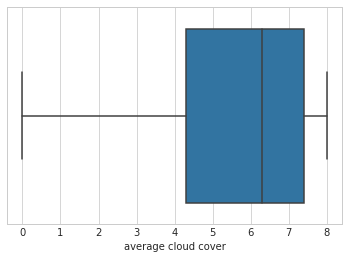

In [230]:
# Plotting a boxplot graph of 'average cloud cover' values to visulize the weather data distributions
sns.boxplot(x=df_data_weather["average cloud cover"])

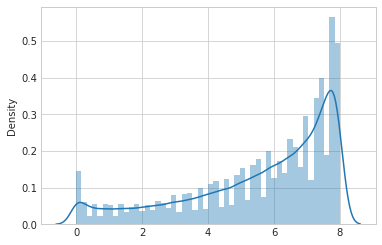

In [231]:
# Plotting a boxplot graph of 'average cloud cover' values to visulize the weather data distributions
sns.distplot(x=df_data_weather["average cloud cover"])

As it can be seen from above two plots that, 'average cloud cover' value has highest value and graph above shows that maximum values occur in **6 to 8**. Therefore, the most simple technique of all is to replace missing data with some constant value. The value can be any number that seemed appropriate. In this case, **Median** would be ideal choice to replace all NaN values **since 'mean' value of all the 'average cloud cover' data will shift towards zero if missing values will be replaced by '0' in 12242 rows which comparitively large number comparing to other missing values**.

In [232]:
# Replace missing values with 'median' value of the column 'average cloud cover'
df_data_weather['average cloud cover'] = df_data_weather['average cloud cover'].fillna(df_data_weather['average cloud cover'].median())

In [233]:
df_data_weather

Stations_ID        Date  Minimum Temperature  Average Temperature  \
0               102  2016-01-01                  4.1                  6.2   
1               102  2016-01-02                 -3.5                  2.0   
2               102  2016-01-03                 -4.9                 -4.0   
3               102  2016-01-04                 -6.2                 -5.3   
4               102  2016-01-05                 -5.7                 -4.4   
...             ...         ...                  ...                  ...   
164035         3028  2021-12-27                  1.0                  3.8   
164036         3028  2021-12-28                  5.5                  7.3   
164037         3028  2021-12-29                  6.5                  8.0   
164038         3028  2021-12-30                 10.6                 12.5   
164039         3028  2021-12-31                 11.5                 13.1   

        Maximum Temperature  relative humidity  Average windspeed (Beaufort)  \
0                       7.4              90.13                           6.8   
1                       5.0              90.71                          15.6   
2                      -2.8              88.46                          16.7   
3                      -4.1              86.33                          13.1   
4                      -2.9              85.88                          13.5   
...                     ...                ...                           ...   
164035                  6.0              88.04                           2.4   
164036                  9.1              87.21                           3.3   
164037                 11.3              95.83                           3.5   
164038                 13.8              91.25                           5.6   
164039                 14.4              81.33                           5.5   

        Maximum windspeed (m/s)  sunshine duration  average cloud cover  Rain  \
0                          12.1              5.733                  6.3   NaN   
1                          22.3              0.000                  6.3   NaN   
2                          21.0              0.000                  6.3   NaN   
3                          19.0              0.000                  6.3   NaN   
4                          18.1              0.000                  6.3   NaN   
...                         ...                ...                  ...   ...   
164035                      8.2              0.100                  7.7   0.9   
164036                     16.7              0.000                  7.7   6.2   
164037                      9.4              0.000                  7.6   5.8   
164038                     13.5              0.000                  7.5   2.3   
164039                     13.1              0.517                  7.7   0.8   

        average air preassure  geographic latitude  geographic longitude  \
0                     1019.03               53.862                 8.127   
1                     1012.65               53.862                 8.127   
2                     1003.80               53.862                 8.127   
3                      990.84               53.862                 8.127   
4                      993.74               53.862                 8.127   
...                       ...                  ...                   ...   
164035                 982.83               51.785                 8.839   
164036                 976.33               51.785                 8.839   
164037                 985.91               51.785                 8.839   
164038                 995.09               51.785                 8.839   
164039                 999.30               51.785                 8.839   

        height  
0           32  
1           32  
2           32  
3           32  
4           32  
...        ...  
164035     157  
164036     157  
164037     157  
164038     157  
164039     157  

[164040 rows x 15 columns]

Now we will find other missing data same as above.

In [234]:
missing_data_weather11 = df_data_weather.isna().sum().sort_values(ascending=False)

In [235]:
missing_data_weather11

Rain                            8739
Average windspeed (Beaufort)    6321
Maximum windspeed (m/s)         6166
Maximum Temperature             2437
Minimum Temperature             2435
sunshine duration               2056
relative humidity                882
average air preassure            569
Average Temperature              158
height                             0
geographic longitude               0
geographic latitude                0
average cloud cover                0
Date                               0
Stations_ID                        0
dtype: int64

- We can see that, there are missing values in rest of the columns. Since we do have total 164040 rows × 12 columns, total number of missing values are less than 10% of whole dataset. So replacing a value with backward fill method in rest of the missing values will not occur any bad effect like 'shifting Mean value towards Zero'. 

- Therefore we will replace missing values with 'bfill' method in rest of the data.

In [236]:
df_data_weather = df_data_weather.fillna(method ='bfill')
df_data_weather

Stations_ID        Date  Minimum Temperature  Average Temperature  \
0               102  2016-01-01                  4.1                  6.2   
1               102  2016-01-02                 -3.5                  2.0   
2               102  2016-01-03                 -4.9                 -4.0   
3               102  2016-01-04                 -6.2                 -5.3   
4               102  2016-01-05                 -5.7                 -4.4   
...             ...         ...                  ...                  ...   
164035         3028  2021-12-27                  1.0                  3.8   
164036         3028  2021-12-28                  5.5                  7.3   
164037         3028  2021-12-29                  6.5                  8.0   
164038         3028  2021-12-30                 10.6                 12.5   
164039         3028  2021-12-31                 11.5                 13.1   

        Maximum Temperature  relative humidity  Average windspeed (Beaufort)  \
0                       7.4              90.13                           6.8   
1                       5.0              90.71                          15.6   
2                      -2.8              88.46                          16.7   
3                      -4.1              86.33                          13.1   
4                      -2.9              85.88                          13.5   
...                     ...                ...                           ...   
164035                  6.0              88.04                           2.4   
164036                  9.1              87.21                           3.3   
164037                 11.3              95.83                           3.5   
164038                 13.8              91.25                           5.6   
164039                 14.4              81.33                           5.5   

        Maximum windspeed (m/s)  sunshine duration  average cloud cover  Rain  \
0                          12.1              5.733                  6.3   0.1   
1                          22.3              0.000                  6.3   0.1   
2                          21.0              0.000                  6.3   0.1   
3                          19.0              0.000                  6.3   0.1   
4                          18.1              0.000                  6.3   0.1   
...                         ...                ...                  ...   ...   
164035                      8.2              0.100                  7.7   0.9   
164036                     16.7              0.000                  7.7   6.2   
164037                      9.4              0.000                  7.6   5.8   
164038                     13.5              0.000                  7.5   2.3   
164039                     13.1              0.517                  7.7   0.8   

        average air preassure  geographic latitude  geographic longitude  \
0                     1019.03               53.862                 8.127   
1                     1012.65               53.862                 8.127   
2                     1003.80               53.862                 8.127   
3                      990.84               53.862                 8.127   
4                      993.74               53.862                 8.127   
...                       ...                  ...                   ...   
164035                 982.83               51.785                 8.839   
164036                 976.33               51.785                 8.839   
164037                 985.91               51.785                 8.839   
164038                 995.09               51.785                 8.839   
164039                 999.30               51.785                 8.839   

        height  
0           32  
1           32  
2           32  
3           32  
4           32  
...        ...  
164035     157  
164036     157  
164037     157  
164038     157  
164039     157  

[164040 rows x 15 columns]

In [238]:
df_data_weather.describe()

Stations_ID  Minimum Temperature  Average Temperature  \
count  164040.000000        164040.000000        164040.000000   
mean     2987.926079             5.614326             9.686943   
std      2260.620392             6.721782             7.487983   
min       102.000000           -30.500000           -27.800000   
25%      1358.000000             0.600000             4.100000   
50%      2712.000000             5.500000             9.400000   
75%      4271.000000            11.100000            15.800000   
max     15000.000000            25.700000            32.000000   

       Maximum Temperature  relative humidity  Average windspeed (Beaufort)  \
count        164040.000000      164040.000000                 164040.000000   
mean             13.628715          77.657028                      4.160905   
std               8.809332          13.129351                      2.702272   
min             -26.300000           3.920000                      0.300000   
25%               6.700000          69.210000                      2.300000   
50%              13.100000          79.380000                      3.400000   
75%              20.500000          87.670000                      5.100000   
max              40.700000         100.000000                     30.100000   

       Maximum windspeed (m/s)  sunshine duration  average cloud cover  \
count            164040.000000      164040.000000        164040.000000   
mean                 11.056452           4.859176             5.619782   
std                   4.950936           4.549140             2.147529   
min                   1.300000           0.000000             0.000000   
25%                   7.700000           0.417000             4.500000   
50%                  10.100000           3.767000             6.300000   
75%                  13.400000           8.467000             7.300000   
max                  60.400000          16.783000             8.000000   

                Rain  average air preassure  geographic latitude  \
count  164040.000000          164040.000000        164040.000000   
mean        2.045243             977.548806            51.128262   
std         4.937264              50.820727             2.150882   
min         0.000000             677.880000            47.399000   
25%         0.000000             965.050000            49.213000   
50%         0.000000             993.480000            50.983000   
75%         1.900000            1009.100000            53.032000   
max       196.900000            1045.440000            55.011000   

       geographic longitude         height  
count         164040.000000  164040.000000  
mean              10.275628     330.810040  
std                2.262190     461.962883  
min                6.024000       0.000000  
25%                8.489000      43.000000  
50%               10.274000     157.000000  
75%               12.102000     446.000000  
max               14.951000    2964.000000

### (ii) Taking 'mean' value of all available stations with respect to each day

In [239]:
df_data_weather.columns

Index(['Stations_ID', 'Date', 'Minimum Temperature', 'Average Temperature',
       'Maximum Temperature', 'relative humidity',
       'Average windspeed (Beaufort)', 'Maximum windspeed (m/s)',
       'sunshine duration', 'average cloud cover', 'Rain',
       'average air preassure', 'geographic latitude', 'geographic longitude',
       'height'],
      dtype='object')

In [240]:
#Swaping two columns (Date and Station ID)

columns_titles = ['Date', 'Stations_ID', 'Minimum Temperature', 'Average Temperature', 
                  'Maximum Temperature', 'relative humidity', 'Average windspeed (Beaufort)', 
                  'Maximum windspeed (m/s)', 'sunshine duration', 'average cloud cover', 
                  'Rain', 'average air preassure', 'geographic latitude', 'geographic longitude', 'height']
df_data_weather = df_data_weather[columns_titles]
df_data_weather

Date  Stations_ID  Minimum Temperature  Average Temperature  \
0       2016-01-01          102                  4.1                  6.2   
1       2016-01-02          102                 -3.5                  2.0   
2       2016-01-03          102                 -4.9                 -4.0   
3       2016-01-04          102                 -6.2                 -5.3   
4       2016-01-05          102                 -5.7                 -4.4   
...            ...          ...                  ...                  ...   
164035  2021-12-27         3028                  1.0                  3.8   
164036  2021-12-28         3028                  5.5                  7.3   
164037  2021-12-29         3028                  6.5                  8.0   
164038  2021-12-30         3028                 10.6                 12.5   
164039  2021-12-31         3028                 11.5                 13.1   

        Maximum Temperature  relative humidity  Average windspeed (Beaufort)  \
0                       7.4              90.13                           6.8   
1                       5.0              90.71                          15.6   
2                      -2.8              88.46                          16.7   
3                      -4.1              86.33                          13.1   
4                      -2.9              85.88                          13.5   
...                     ...                ...                           ...   
164035                  6.0              88.04                           2.4   
164036                  9.1              87.21                           3.3   
164037                 11.3              95.83                           3.5   
164038                 13.8              91.25                           5.6   
164039                 14.4              81.33                           5.5   

        Maximum windspeed (m/s)  sunshine duration  average cloud cover  Rain  \
0                          12.1              5.733                  6.3   0.1   
1                          22.3              0.000                  6.3   0.1   
2                          21.0              0.000                  6.3   0.1   
3                          19.0              0.000                  6.3   0.1   
4                          18.1              0.000                  6.3   0.1   
...                         ...                ...                  ...   ...   
164035                      8.2              0.100                  7.7   0.9   
164036                     16.7              0.000                  7.7   6.2   
164037                      9.4              0.000                  7.6   5.8   
164038                     13.5              0.000                  7.5   2.3   
164039                     13.1              0.517                  7.7   0.8   

        average air preassure  geographic latitude  geographic longitude  \
0                     1019.03               53.862                 8.127   
1                     1012.65               53.862                 8.127   
2                     1003.80               53.862                 8.127   
3                      990.84               53.862                 8.127   
4                      993.74               53.862                 8.127   
...                       ...                  ...                   ...   
164035                 982.83               51.785                 8.839   
164036                 976.33               51.785                 8.839   
164037                 985.91               51.785                 8.839   
164038                 995.09               51.785                 8.839   
164039                 999.30               51.785                 8.839   

        height  
0           32  
1           32  
2           32  
3           32  
4           32  
...        ...  
164035     157  
164036     157  
164037     157  
164038     157  
164039     157  

[164040 rows x 15 columns]

In [241]:
#Taking 'mean' value of all stations available for respective Day for each column representing weather information

#Taking 'mean' value of First three columns of the Dataframe
df_data_weather_311 = df_data_weather.groupby('Date') \
                            .agg(x = ('Minimum Temperature', 'mean'), \
                                 y = ('Average Temperature', 'mean'),
                                 z = ('Maximum Temperature', 'mean')).round(3)
df_data_weather_311.rename(columns={"x":"Minimum_Temperature", "y":"Average_Temperature", 
                                    "z":"Maximum_Temperature"}, inplace=True)
df_data_weather_3111 = pd.DataFrame(df_data_weather_311)         

#Taking 'mean' value of next three columns of the Dataframe
df_data_weather_312 = df_data_weather.groupby('Date') \
                            .agg(x = ('relative humidity', 'mean'), \
                                 y = ('Average windspeed (Beaufort)', 'mean'),
                                 z = ('Maximum windspeed (m/s)', 'mean')).round(3)
df_data_weather_312.rename(columns={"x":"relative_humidity", "y":"Average_windspeed_Beaufort", 
                                    "z":"Maximum_windspeed"}, inplace=True)
df_data_weather_3112 = pd.DataFrame(df_data_weather_312)    

#Taking 'mean' value of next Four columns of the Dataframe
df_data_weather_313 = df_data_weather.groupby('Date') \
                            .agg(x = ('sunshine duration', 'mean'), \
                                 y = ('average cloud cover', 'mean'),
                                 z = ('Rain', 'mean'),
                                 w = ('average air preassure', 'mean')).round(3)
df_data_weather_313.rename(columns={"x":"sunshine_duration", "y":"average_cloud_cover", 
                                    "z":"Rain", "w":"average_air_preassure"}, inplace=True)
df_data_weather_3113 = pd.DataFrame(df_data_weather_313)

#Taking 'mean' value of Last Four columns of the Dataframe
df_data_weather_314 = df_data_weather.groupby('Date') \
                            .agg(x = ('geographic latitude', 'mean'), \
                                 y = ('geographic longitude', 'mean'),
                                 z = ('height', 'mean')).round(3)
df_data_weather_314.rename(columns={"x":"geographic_latitude", "y":"geographic_longitude", 
                                    "z":"height"}, inplace=True)
df_data_weather_3114 = pd.DataFrame(df_data_weather_314)

In [242]:
# Merging the dataframe created in above cell to create a one combined dataframe#

df_data_wea_1 = pd.concat([df_data_weather_3111, df_data_weather_3112], axis=1)     # Merging 'df_data_weather_3111' and 'df_data_weather_3112'
df_data_wea_2 = pd.concat([df_data_wea_1, df_data_weather_3113], axis=1)            # Merging 'df_data_wea_1' and 'df_data_weather_3113'
df_data_weather_mean = pd.concat([df_data_wea_2, df_data_weather_3114], axis=1)     # Merging 'df_data_wea_2' and 'df_data_weather_3114'
df_data_weather_mean.reset_index(inplace=True)                                      # resetting of Index in dataframe
df_data_weather_mean

Date  Minimum_Temperature  Average_Temperature  \
0     2016-01-01                0.383                2.595   
1     2016-01-02               -2.707                0.200   
2     2016-01-03               -3.892               -2.350   
3     2016-01-04               -4.558               -2.530   
4     2016-01-05               -3.097               -1.312   
...          ...                  ...                  ...   
2187  2021-12-27               -1.842                0.764   
2188  2021-12-28                1.376                3.707   
2189  2021-12-29                3.847                5.489   
2190  2021-12-30                6.551                9.762   
2191  2021-12-31                8.099               10.354   

      Maximum_Temperature  relative_humidity  Average_windspeed_Beaufort  \
0                   4.508             93.714                       2.955   
1                   2.809             89.423                       5.862   
2                  -0.683             87.281                       6.238   
3                  -0.283             87.616                       5.745   
4                   0.397             87.762                       4.982   
...                   ...                ...                         ...   
2187                3.296             88.128                       4.397   
2188                6.088             91.089                       5.535   
2189                7.858             94.130                       4.408   
2190               11.949             93.599                       5.709   
2191               12.328             86.797                       6.047   

      Maximum_windspeed  sunshine_duration  average_cloud_cover   Rain  \
0                 8.404              1.622                6.671  0.209   
1                12.914              0.237                7.459  3.393   
2                12.776              0.978                6.971  2.743   
3                12.629              0.407                6.793  3.007   
4                10.578              0.803                6.824  2.017   
...                 ...                ...                  ...    ...   
2187              9.881              0.955                7.068  1.509   
2188             15.101              0.257                7.407  7.204   
2189             11.705              0.143                7.620  5.018   
2190             13.068              0.166                7.497  2.847   
2191             13.372              2.474                6.292  1.424   

      average_air_preassure  geographic_latitude  geographic_longitude  \
0                   985.861               51.164                10.268   
1                   978.853               51.164                10.268   
2                   971.403               51.164                10.268   
3                   957.374               51.164                10.268   
4                   959.598               51.164                10.268   
...                     ...                  ...                   ...   
2187                965.484               51.122                10.193   
2188                959.747               51.122                10.193   
2189                967.371               51.122                10.193   
2190                975.880               51.122                10.193   
2191                979.415               51.122                10.193   

       height  
0     326.145  
1     326.145  
2     326.145  
3     326.145  
4     326.145  
...       ...  
2187  333.959  
2188  333.959  
2189  333.959  
2190  333.959  
2191  333.959  

[2192 rows x 14 columns]

In [243]:
df_data_weather_mean.dtypes

Date                           object
Minimum_Temperature           float64
Average_Temperature           float64
Maximum_Temperature           float64
relative_humidity             float64
Average_windspeed_Beaufort    float64
Maximum_windspeed             float64
sunshine_duration             float64
average_cloud_cover           float64
Rain                          float64
average_air_preassure         float64
geographic_latitude           float64
geographic_longitude          float64
height                        float64
dtype: object

Above dataframe is a final dataframe of weather which has 'mean' value of the all available stations against 1 particular day. Therefore, each day has its own weather data and in total we now have 2192 rows which is exactly same as in the Energy produce dataset. 

# Merging Dataframes to make 'Master Dataframe' 

In this section, two different dataframes to make a combined Master Dataframe which can be fed into our Artificial Neural Network created in next section of the Assignment.

- 'df_data_weather_mean' : which as weather data inlcuding longtitude, lattitude and Height for each day (2192 X 14)
- 'df_data_ene_perday_final': which has Energy produce data including respective capacities for each day (2192 X 8) 

In [244]:
df_data_weather_mean.columns

Index(['Date', 'Minimum_Temperature', 'Average_Temperature',
       'Maximum_Temperature', 'relative_humidity',
       'Average_windspeed_Beaufort', 'Maximum_windspeed', 'sunshine_duration',
       'average_cloud_cover', 'Rain', 'average_air_preassure',
       'geographic_latitude', 'geographic_longitude', 'height'],
      dtype='object')

In [245]:
df_data_ene_perday_final_capacity.columns

Index(['index', 'Date', 'Wind_Offshore[MWh]', 'Wind_Onshore_[MWh]',
       'Photovoltaics_[MWh]', 'wind_offca', 'wind_onca', 'PV_ca'],
      dtype='object')

In [246]:
# Initializing new Pandas Dataframe to store all weather data and energy data
df_master = pd.DataFrame()

# Combining different columns from 'df_data_weather_mean' dataframe in to one new initialized 'df_master' dataframe 
df_master['Date']                       = df_data_weather_mean['Date']
df_master['Minimum_Temperature']        = df_data_weather_mean['Minimum_Temperature']
df_master['Average_Temperature']        = df_data_weather_mean['Average_Temperature']
df_master['Maximum_Temperature']        = df_data_weather_mean['Maximum_Temperature']
df_master['relative_humidity']          = df_data_weather_mean['relative_humidity']
df_master['Average_windspeed_Beaufort'] = df_data_weather_mean['Average_windspeed_Beaufort']
df_master['Maximum_windspeed']          = df_data_weather_mean['Maximum_windspeed']
df_master['sunshine_duration']          = df_data_weather_mean['sunshine_duration']
df_master['average_cloud_cover']        = df_data_weather_mean['average_cloud_cover']
df_master['Rain']                       = df_data_weather_mean['Rain']
df_master['average_air_preassure']      = df_data_weather_mean['average_air_preassure']
df_master['geographic_latitude']        = df_data_weather_mean['geographic_latitude']
df_master['geographic_longitude']       = df_data_weather_mean['geographic_longitude']
df_master['height']                     = df_data_weather_mean['height']

# Combining different columns from 'df_data_ene_perday_final_capacity' dataframe in to one new initialized 'df_master' dataframe
df_master['Capacity_Wind_Offshore']     = df_data_ene_perday_final_capacity['wind_offca']
df_master['Capacity_Wind_Onshore']      = df_data_ene_perday_final_capacity['wind_onca']
df_master['Capacity_PV']                = df_data_ene_perday_final_capacity['PV_ca']
df_master['Wind_Offshore[MWh]']         = df_data_ene_perday_final_capacity['Wind_Offshore[MWh]']
df_master['Wind_Onshore_[MWh]']         = df_data_ene_perday_final_capacity['Wind_Onshore_[MWh]']
df_master['Photovoltaics_[MWh]']        = df_data_ene_perday_final_capacity['Photovoltaics_[MWh]']

In [247]:
df_master

Date  Minimum_Temperature  Average_Temperature  \
0     2016-01-01                0.383                2.595   
1     2016-01-02               -2.707                0.200   
2     2016-01-03               -3.892               -2.350   
3     2016-01-04               -4.558               -2.530   
4     2016-01-05               -3.097               -1.312   
...          ...                  ...                  ...   
2187  2021-12-27               -1.842                0.764   
2188  2021-12-28                1.376                3.707   
2189  2021-12-29                3.847                5.489   
2190  2021-12-30                6.551                9.762   
2191  2021-12-31                8.099               10.354   

      Maximum_Temperature  relative_humidity  Average_windspeed_Beaufort  \
0                   4.508             93.714                       2.955   
1                   2.809             89.423                       5.862   
2                  -0.683             87.281                       6.238   
3                  -0.283             87.616                       5.745   
4                   0.397             87.762                       4.982   
...                   ...                ...                         ...   
2187                3.296             88.128                       4.397   
2188                6.088             91.089                       5.535   
2189                7.858             94.130                       4.408   
2190               11.949             93.599                       5.709   
2191               12.328             86.797                       6.047   

      Maximum_windspeed  sunshine_duration  average_cloud_cover   Rain  \
0                 8.404              1.622                6.671  0.209   
1                12.914              0.237                7.459  3.393   
2                12.776              0.978                6.971  2.743   
3                12.629              0.407                6.793  3.007   
4                10.578              0.803                6.824  2.017   
...                 ...                ...                  ...    ...   
2187              9.881              0.955                7.068  1.509   
2188             15.101              0.257                7.407  7.204   
2189             11.705              0.143                7.620  5.018   
2190             13.068              0.166                7.497  2.847   
2191             13.372              2.474                6.292  1.424   

      average_air_preassure  geographic_latitude  geographic_longitude  \
0                   985.861               51.164                10.268   
1                   978.853               51.164                10.268   
2                   971.403               51.164                10.268   
3                   957.374               51.164                10.268   
4                   959.598               51.164                10.268   
...                     ...                  ...                   ...   
2187                965.484               51.122                10.193   
2188                959.747               51.122                10.193   
2189                967.371               51.122                10.193   
2190                975.880               51.122                10.193   
2191                979.415               51.122                10.193   

       height  Capacity_Wind_Offshore  Capacity_Wind_Onshore  Capacity_PV  \
0     326.145                    3283                  41168        38686   
1     326.145                    3283                  41168        38686   
2     326.145                    3283                  41168        38686   
3     326.145                    3283                  41168        38686   
4     326.145                    3283                  41168        38686   
...       ...                     ...                    ...          ...   
2187  333.959                    7774

- Now, we have a Master master dataframe which contains all weather data and renewable energy procuded values during each day between 01.01.2016 and 31.12.2021. 
- Before feeding this dataframe to our Artificial Neural network, it is necessary to check what are the most important and influencial Features which affects each type of Energy production. 
- Therefore, below, plot shows correlation values (between 0 and 1) between each independent and dependent variables. Here, Energy production depends on the weather of each day therefore, Energy production data are dependent variable where Weather data are independent variables. 

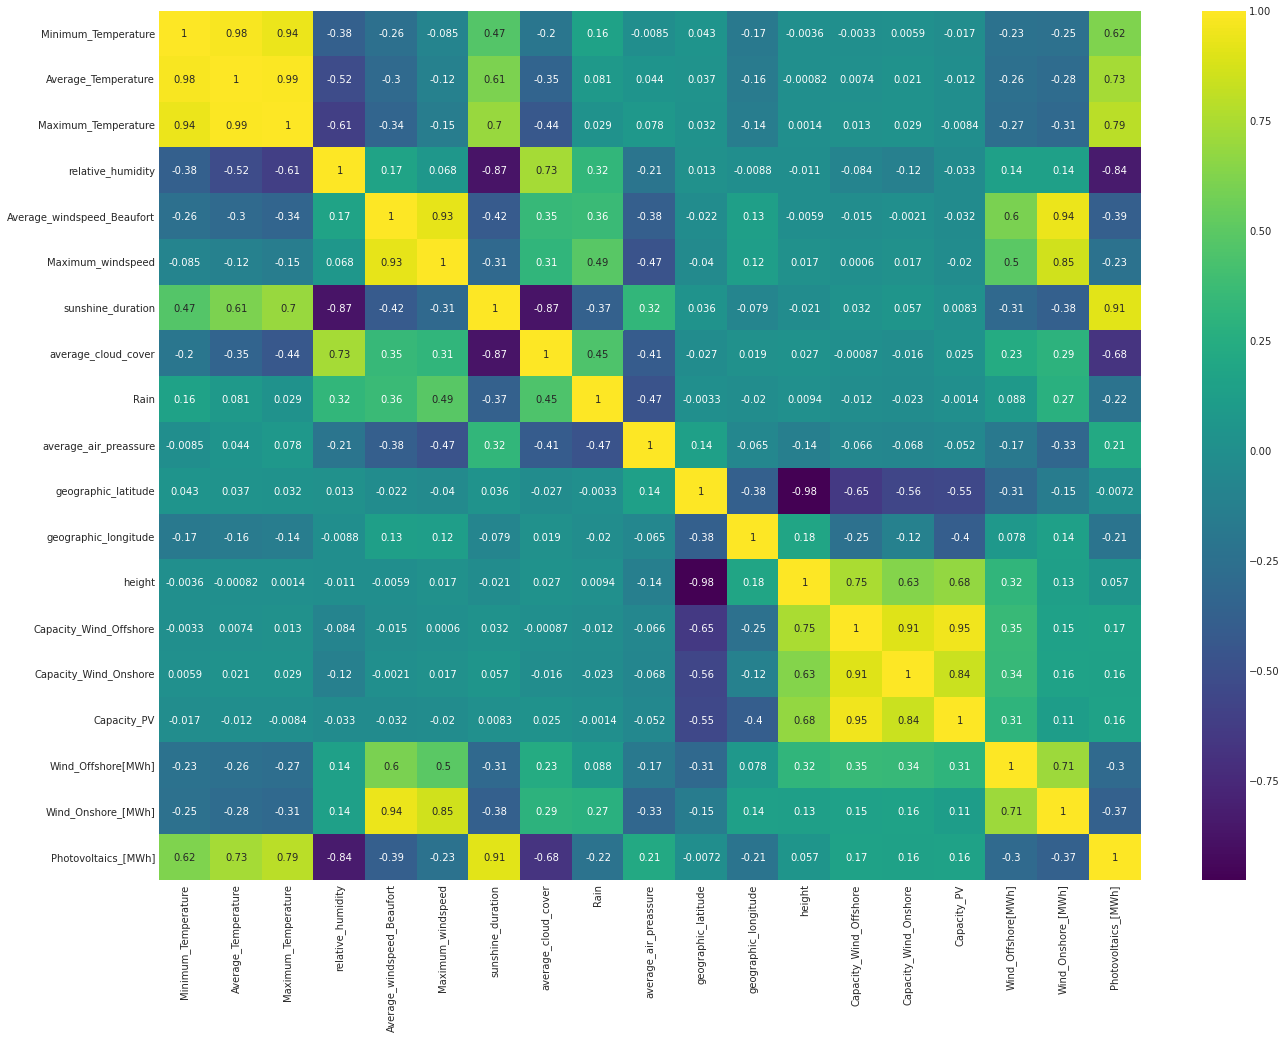

In [248]:
# Plotting correlation using Heatfrom from seborn library

corr = df_master.corr()                         # Feeding master dataframe of which we are finding correlation value 
plt.figure(figsize=(22,16))                     # taking plot size 22 X 16
sns.heatmap(corr, cmap="viridis",annot=True)    # feeding correlation value (corr) to heatmap for visulizing the result with values added in every grid
plt.show()

In [249]:
df_master.columns

Index(['Date', 'Minimum_Temperature', 'Average_Temperature',
       'Maximum_Temperature', 'relative_humidity',
       'Average_windspeed_Beaufort', 'Maximum_windspeed', 'sunshine_duration',
       'average_cloud_cover', 'Rain', 'average_air_preassure',
       'geographic_latitude', 'geographic_longitude', 'height',
       'Capacity_Wind_Offshore', 'Capacity_Wind_Onshore', 'Capacity_PV',
       'Wind_Offshore[MWh]', 'Wind_Onshore_[MWh]', 'Photovoltaics_[MWh]'],
      dtype='object')

Below Pairplots of Wind_Offshore, Wind_Onshore and Photovoltaic energy shows the correlation with available weather parameters. 

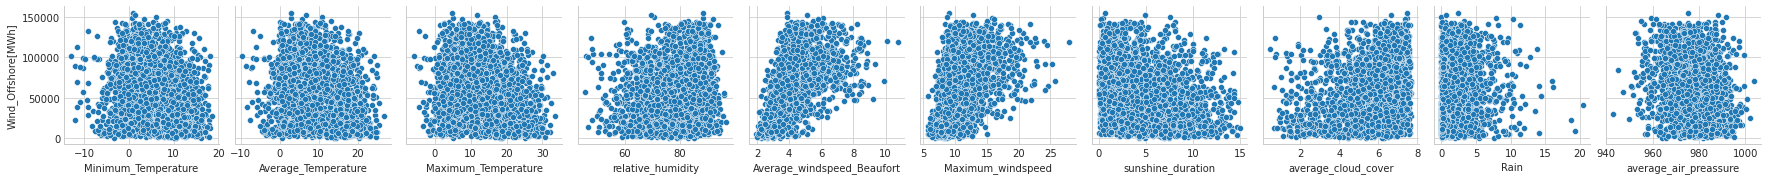

In [250]:
sns.pairplot(data=df_master,
                  x_vars=['Minimum_Temperature', 'Average_Temperature', 'Maximum_Temperature', 'relative_humidity', 
                          'Average_windspeed_Beaufort', 'Maximum_windspeed', 'sunshine_duration', 'average_cloud_cover', 
                          'Rain', 'average_air_preassure'],
                  y_vars=['Wind_Offshore[MWh]'])

Pairplot of Windoffshore shows that it is directly correlated to maximum windspeed and Average windspeed as almost linearly distributed scattered plot can be seen in the image.

Note: Kindly open the Pairplot image to new tab (By clicking right click on Image) for better visulization

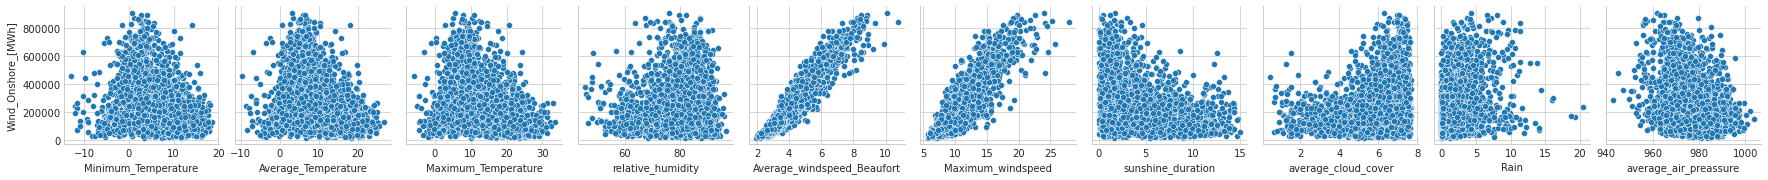

In [251]:
sns.pairplot(data=df_master,
                  x_vars=['Minimum_Temperature', 'Average_Temperature', 'Maximum_Temperature', 'relative_humidity', 
                          'Average_windspeed_Beaufort', 'Maximum_windspeed', 'sunshine_duration', 'average_cloud_cover', 
                          'Rain', 'average_air_preassure'],
                  y_vars=['Wind_Onshore_[MWh]'])

Pairplot of Windonshore energy shows that it is directly correlated to maximum windspeed and Average windspeed as nice linearly distributed scattered plot can be seen in the image. Relative Humidity is the also one which is correlated to Wind onshore energy production, but in inverse order. 

Note: Kindly open the Pairplot image to new tab (By clicking right click on Image) for better visulization

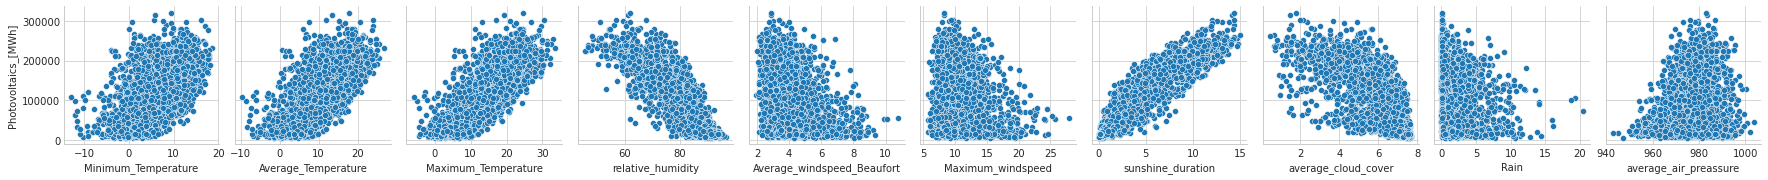

In [252]:
sns.pairplot(data=df_master,
                  x_vars=['Minimum_Temperature', 'Average_Temperature', 'Maximum_Temperature', 'relative_humidity', 
                          'Average_windspeed_Beaufort', 'Maximum_windspeed', 'sunshine_duration', 'average_cloud_cover', 
                          'Rain', 'average_air_preassure'],
                  y_vars=['Photovoltaics_[MWh]'])

Pairplot of Photovoltaic energy shows that it is mostly directly correlated to sunshine duration, maximum and average temprature as nice linearly distributed scattered plot can be seen in the image. Relative Humidity and average cloud cover is the also one which is correlated to Photovoltaic energy production, but in inverse order. 

Note: Kindly open the Pairplot image to new tab (By clicking right click on Image) for better visulization

**Concluding points from above visulization plots**

- Photovoltaics Energy is directly correlated with **'sunshine_duration' (0.91)** which is heighest correlated feature, **'Maximum_Tempearture' (0.79)**, and inversely correlated with **'average_cloud_cover' and relative humidity (-0.68) and (-0.84)** respectively. 


- Wind_Onshore Energy has highest correlation with **'average_windspeed' (0.94)**, good coorelation with **'Maximum_windspeed' (0.85)** and **inversely proportion with sunshine_duration (-0.38)**.
  
- Wind_Offshore Energy has also **highest correlation with 'average_windspeed' (0.6)**, good coorelation with **'Maximum_windspeed' (0.5)** and inversely proportion with **sunshine_duration (-0.31)**.

In [253]:
df_master

Date  Minimum_Temperature  Average_Temperature  \
0     2016-01-01                0.383                2.595   
1     2016-01-02               -2.707                0.200   
2     2016-01-03               -3.892               -2.350   
3     2016-01-04               -4.558               -2.530   
4     2016-01-05               -3.097               -1.312   
...          ...                  ...                  ...   
2187  2021-12-27               -1.842                0.764   
2188  2021-12-28                1.376                3.707   
2189  2021-12-29                3.847                5.489   
2190  2021-12-30                6.551                9.762   
2191  2021-12-31                8.099               10.354   

      Maximum_Temperature  relative_humidity  Average_windspeed_Beaufort  \
0                   4.508             93.714                       2.955   
1                   2.809             89.423                       5.862   
2                  -0.683             87.281                       6.238   
3                  -0.283             87.616                       5.745   
4                   0.397             87.762                       4.982   
...                   ...                ...                         ...   
2187                3.296             88.128                       4.397   
2188                6.088             91.089                       5.535   
2189                7.858             94.130                       4.408   
2190               11.949             93.599                       5.709   
2191               12.328             86.797                       6.047   

      Maximum_windspeed  sunshine_duration  average_cloud_cover   Rain  \
0                 8.404              1.622                6.671  0.209   
1                12.914              0.237                7.459  3.393   
2                12.776              0.978                6.971  2.743   
3                12.629              0.407                6.793  3.007   
4                10.578              0.803                6.824  2.017   
...                 ...                ...                  ...    ...   
2187              9.881              0.955                7.068  1.509   
2188             15.101              0.257                7.407  7.204   
2189             11.705              0.143                7.620  5.018   
2190             13.068              0.166                7.497  2.847   
2191             13.372              2.474                6.292  1.424   

      average_air_preassure  geographic_latitude  geographic_longitude  \
0                   985.861               51.164                10.268   
1                   978.853               51.164                10.268   
2                   971.403               51.164                10.268   
3                   957.374               51.164                10.268   
4                   959.598               51.164                10.268   
...                     ...                  ...                   ...   
2187                965.484               51.122                10.193   
2188                959.747               51.122                10.193   
2189                967.371               51.122                10.193   
2190                975.880               51.122                10.193   
2191                979.415               51.122                10.193   

       height  Capacity_Wind_Offshore  Capacity_Wind_Onshore  Capacity_PV  \
0     326.145                    3283                  41168        38686   
1     326.145                    3283                  41168        38686   
2     326.145                    3283                  41168        38686   
3     326.145                    3283                  41168        38686   
4     326.145                    3283                  41168        38686   
...       ...                     ...                    ...          ...   
2187  333.959                    7774

## Developing and evaluation of the ANN (~30 Points)


In [254]:
df_master

Date  Minimum_Temperature  Average_Temperature  \
0     2016-01-01                0.383                2.595   
1     2016-01-02               -2.707                0.200   
2     2016-01-03               -3.892               -2.350   
3     2016-01-04               -4.558               -2.530   
4     2016-01-05               -3.097               -1.312   
...          ...                  ...                  ...   
2187  2021-12-27               -1.842                0.764   
2188  2021-12-28                1.376                3.707   
2189  2021-12-29                3.847                5.489   
2190  2021-12-30                6.551                9.762   
2191  2021-12-31                8.099               10.354   

      Maximum_Temperature  relative_humidity  Average_windspeed_Beaufort  \
0                   4.508             93.714                       2.955   
1                   2.809             89.423                       5.862   
2                  -0.683             87.281                       6.238   
3                  -0.283             87.616                       5.745   
4                   0.397             87.762                       4.982   
...                   ...                ...                         ...   
2187                3.296             88.128                       4.397   
2188                6.088             91.089                       5.535   
2189                7.858             94.130                       4.408   
2190               11.949             93.599                       5.709   
2191               12.328             86.797                       6.047   

      Maximum_windspeed  sunshine_duration  average_cloud_cover   Rain  \
0                 8.404              1.622                6.671  0.209   
1                12.914              0.237                7.459  3.393   
2                12.776              0.978                6.971  2.743   
3                12.629              0.407                6.793  3.007   
4                10.578              0.803                6.824  2.017   
...                 ...                ...                  ...    ...   
2187              9.881              0.955                7.068  1.509   
2188             15.101              0.257                7.407  7.204   
2189             11.705              0.143                7.620  5.018   
2190             13.068              0.166                7.497  2.847   
2191             13.372              2.474                6.292  1.424   

      average_air_preassure  geographic_latitude  geographic_longitude  \
0                   985.861               51.164                10.268   
1                   978.853               51.164                10.268   
2                   971.403               51.164                10.268   
3                   957.374               51.164                10.268   
4                   959.598               51.164                10.268   
...                     ...                  ...                   ...   
2187                965.484               51.122                10.193   
2188                959.747               51.122                10.193   
2189                967.371               51.122                10.193   
2190                975.880               51.122                10.193   
2191                979.415               51.122                10.193   

       height  Capacity_Wind_Offshore  Capacity_Wind_Onshore  Capacity_PV  \
0     326.145                    3283                  41168        38686   
1     326.145                    3283                  41168        38686   
2     326.145                    3283                  41168        38686   
3     326.145                    3283                  41168        38686   
4     326.145                    3283                  41168        38686   
...       ...                     ...                    ...          ...   
2187  333.959                    7774

We will use above dataframe 'df_master' and will obtain the highly correlated features with respect to energy prduction to predict energy outcome values.

In [255]:
# Importing required libraries to run ANN

import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import mean_squared_error
from keras import backend as K
from keras.callbacks import EarlyStopping

 In this section, by using ANN with linear regression algorithm, we aim to forecast the value of total energy (Wind Energy + Photovolatic Energy) production with minimum error. 

We are targeting Energy outcomes by giving Weather properties in ANN, various weather peroperties are called as Independent variables whereas Energy outcomes are called as dependent variales. In the language of Neural Network, it can be fair to say **Weather properties as 'Features' and Energy outcome values as 'Targets'**

### STEP-1: Finding total Wind energy

In below two cells, total wind energy is found by addition of 'Wind_Offshore[MWh]' and 'Wind_Onshore[MWh]'. Similarly Capacity of both given energies are also added to make it total wind energy capacity.

In [256]:
df_master['total_wind_energy[MWh]'] = df_master["Wind_Offshore[MWh]"] + df_master["Wind_Onshore_[MWh]"]

In [257]:
df_master['total_capacity_Wind'] = df_master["Capacity_Wind_Offshore"] + df_master["Capacity_Wind_Onshore"]

In [258]:
df_master

Date  Minimum_Temperature  Average_Temperature  \
0     2016-01-01                0.383                2.595   
1     2016-01-02               -2.707                0.200   
2     2016-01-03               -3.892               -2.350   
3     2016-01-04               -4.558               -2.530   
4     2016-01-05               -3.097               -1.312   
...          ...                  ...                  ...   
2187  2021-12-27               -1.842                0.764   
2188  2021-12-28                1.376                3.707   
2189  2021-12-29                3.847                5.489   
2190  2021-12-30                6.551                9.762   
2191  2021-12-31                8.099               10.354   

      Maximum_Temperature  relative_humidity  Average_windspeed_Beaufort  \
0                   4.508             93.714                       2.955   
1                   2.809             89.423                       5.862   
2                  -0.683             87.281                       6.238   
3                  -0.283             87.616                       5.745   
4                   0.397             87.762                       4.982   
...                   ...                ...                         ...   
2187                3.296             88.128                       4.397   
2188                6.088             91.089                       5.535   
2189                7.858             94.130                       4.408   
2190               11.949             93.599                       5.709   
2191               12.328             86.797                       6.047   

      Maximum_windspeed  sunshine_duration  average_cloud_cover   Rain  ...  \
0                 8.404              1.622                6.671  0.209  ...   
1                12.914              0.237                7.459  3.393  ...   
2                12.776              0.978                6.971  2.743  ...   
3                12.629              0.407                6.793  3.007  ...   
4                10.578              0.803                6.824  2.017  ...   
...                 ...                ...                  ...    ...  ...   
2187              9.881              0.955                7.068  1.509  ...   
2188             15.101              0.257                7.407  7.204  ...   
2189             11.705              0.143                7.620  5.018  ...   
2190             13.068              0.166                7.497  2.847  ...   
2191             13.372              2.474                6.292  1.424  ...   

      geographic_longitude   height  Capacity_Wind_Offshore  \
0                   10.268  326.145                    3283   
1                   10.268  326.145                    3283   
2                   10.268  326.145                    3283   
3                   10.268  326.145                    3283   
4                   10.268  326.145                    3283   
...                    ...      ...                     ...   
2187                10.193  333.959                    7774   
2188                10.193  333.959                    7774   
2189                10.193  333.959                    7774   
2190                10.193  333.959                    7774   
2191                10.193  333.959                    7774   

      Capacity_Wind_Onshore  Capacity_PV  Wind_Offshore[MWh]  \
0                     41168        38686               20999   
1                     41168        38686               64280   
2                     41168        38686               62987   
3                     41168        38686               63665   
4                     41168        38686               62319   
...                     ...          ...                 ...   
2187                  54499        53302               98740   
2188                  54499        53302               80791   
2189                  54499        53302               43924   
2190    

### STEP-2: Correlation values of Every energies to each weather parameters

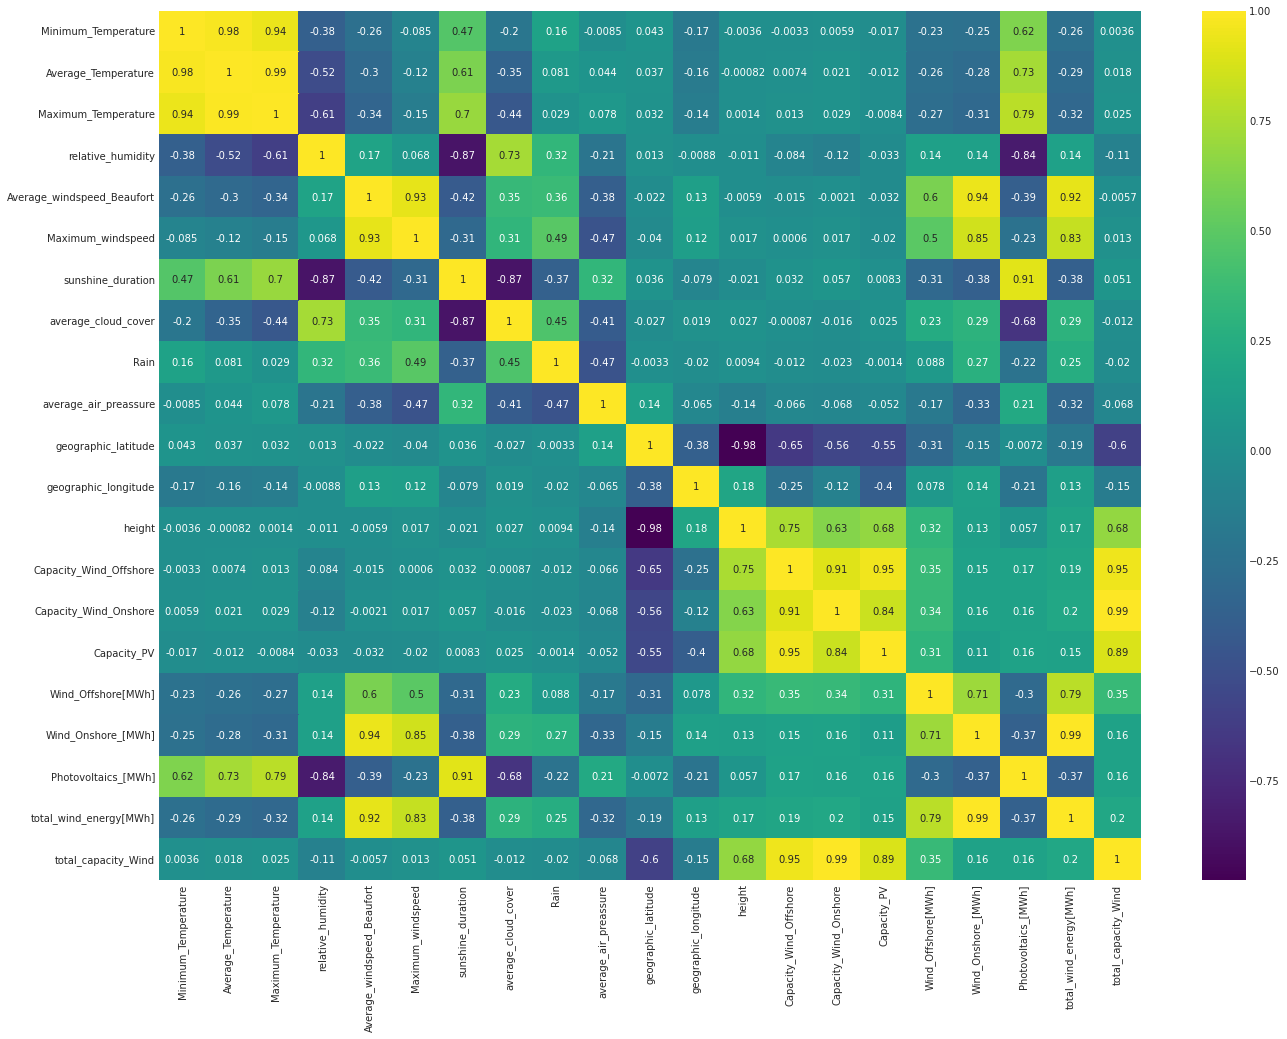

In [259]:
# Plotting a heatmap to obtain the correlation values between energies and weather parameters

corre = df_master.corr()                               # Feeding master dataframe of which we are finding correlation value 
plt.figure(figsize=(22,16))                            # taking plot size 22 X 16
sns.heatmap(corre, cmap="viridis",annot=True)          # feeding correlation value (corre) to heatmap for visulizing the result with values added in every grid
plt.show()

- It can be clearly seen from above heatmap that, Total Wind energy has heighest correlation with Average Windspeed(0.92) and with Maximum Windspeed (0.83) and also it has inversely correlation with Sunshine duration (0.38).


- For Photovoltaics, it has good and highest correlation with the sunshine duration (0.91) and correlation with Maximum temparature, Average Temperature and minimum temprature 0.79, 0.73, 0.62 respectively. On the other hand, This taregt value has inverly correlated with Relative Humidity and avaerage cloud cover -0.84 and -0.68 respectively. 

- Both Targets (Total Wind energy and Photovoltaics energy) has some correlation with their respective capacity values, 0.15 and 0.16 respectively. Therefore This feature is also considered useful for the prediction from ANN.


- Therefore below mentioend features (or attributes) are most likely be the important whose values will be fed into our ANN.

### STEP-3: Modelling ANN visulizing the results

### SECTION-3.1: Using only most correlated Features from Dataframe for ANN

In [260]:
df_master.columns

Index(['Date', 'Minimum_Temperature', 'Average_Temperature',
       'Maximum_Temperature', 'relative_humidity',
       'Average_windspeed_Beaufort', 'Maximum_windspeed', 'sunshine_duration',
       'average_cloud_cover', 'Rain', 'average_air_preassure',
       'geographic_latitude', 'geographic_longitude', 'height',
       'Capacity_Wind_Offshore', 'Capacity_Wind_Onshore', 'Capacity_PV',
       'Wind_Offshore[MWh]', 'Wind_Onshore_[MWh]', 'Photovoltaics_[MWh]',
       'total_wind_energy[MWh]', 'total_capacity_Wind'],
      dtype='object')

####  Step 1: Using only most correlated features 

In [261]:
# Defining Feature and Target columns

features_1 = ['Maximum_Temperature', 'Average_windspeed_Beaufort', 'relative_humidity', 'sunshine_duration', 
                    'average_cloud_cover']                                 # Defining Name of various Features

targets_1 = ['Photovoltaics_[MWh]', 'total_wind_energy[MWh]']              # Defining Name of Targets

x_1 = df_master[features_1]                                                # Making a dataframe containg Features
y_1 = df_master[targets_1]                                                 # Making a dataframe containing targets

####  Step 2: Train Test Split

In [262]:
# Splitting Features and Targets into Training Dataset and Testing Dataset. Testing dataset is 20% of the whole dataset

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_1,y_1, random_state = 1, test_size = 0.2)

In [263]:
# Printing shape of Training and Testing dataset of Features and Targets

print(x_train1.shape)  
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(1753, 5)
(439, 5)
(1753, 2)
(439, 2)


####  Step 3: Normalizing the input

As we can see above, that values in the master dataframe is very diverese and spreaded in a wide range. Bigger values will also take longer computational time. 

In the Neural Network, scaled values are needed. In the cell below, We normalize the input to obtain the every value between a particular range without distorting the difference. By normalizing the input, we give every value the same importance.

As we know that, we should not scale the Target values, therefore, in the cell below, normalized values of x_train1 and x_test1 are obtained.

In [264]:
# Normalizing the Training Features x

norm1 = tf.keras.layers.experimental.preprocessing.Normalization()
norm1.adapt(x_train1)
x_train1 = norm1(x_train1)

In [265]:
# Normalizing the Testing Features x

norm11 = tf.keras.layers.experimental.preprocessing.Normalization()
norm11.adapt(x_test1)
x_test1 = norm1(x_test1)

In [266]:
x_train1.shape       #shape of training Feature x

TensorShape([1753, 5])

####  section 4: Modelling the ANN

In [267]:
# create model
# While creating a Neural Network, Activation function (ReLu) is used in Input and Hidden layers. 
# Because of regression analysis, there is no any activation function (Or Linear activation function) in output layer as we wish to have absolute number after the model performs without any mathematical operations

model1 = Sequential()
model1.add(Dense(5, input_dim=x_train1.shape[1], kernel_initializer='normal', activation='relu'))  # Inpute layer with 5 Neurons
model1.add(Dense(200, input_dim=200, activation='relu'))                                           # Hidden layer 1 with 200 Neurons
model1.add(Dense(100, input_dim=100, activation='relu'))                                           # Hidden Layer 2 with 100 Neurons
model1.add(Dense(2, activation='linear'))                                                          # Output layer with 2 Neurons

# Compile model with Mean Absolute Error as a loss function and Adam as an optimizer
model1.compile(loss='mean_absolute_percentage_error', optimizer='adam')                    

In [268]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 200)               1200      
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
Total params: 21,532
Trainable params: 21,532
Non-trainable params: 0
_________________________________________________________________


In [269]:
def plot(history):
    # plotting the metrics
    %matplotlib inline 
    plt.rcParams['figure.dpi'] = 300

    fig = plt.figure()
    #plt.subplot(2,1,1)
    plt.plot(history.history['loss'])                # Plotting Training error
    plt.plot(history.history['val_loss'])            # Plotting Testing error
    plt.title('model mae')
    plt.ylabel('mean_absolute_percentage_error')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.tight_layout()

    plt.show()

Epoch 1/2500
55/55 - 1s - loss: 99.9981 - val_loss: 99.9929 - 544ms/epoch - 10ms/step
Epoch 2/2500
55/55 - 0s - loss: 99.9511 - val_loss: 99.8674 - 77ms/epoch - 1ms/step
Epoch 3/2500
55/55 - 0s - loss: 99.5391 - val_loss: 99.0507 - 83ms/epoch - 2ms/step
Epoch 4/2500
55/55 - 0s - loss: 97.7508 - val_loss: 96.1673 - 90ms/epoch - 2ms/step
Epoch 5/2500
55/55 - 0s - loss: 93.2307 - val_loss: 90.3260 - 101ms/epoch - 2ms/step
Epoch 6/2500
55/55 - 0s - loss: 88.1490 - val_loss: 85.7719 - 89ms/epoch - 2ms/step
Epoch 7/2500
55/55 - 0s - loss: 84.5704 - val_loss: 82.0741 - 78ms/epoch - 1ms/step
Epoch 8/2500
55/55 - 0s - loss: 81.0900 - val_loss: 78.9316 - 99ms/epoch - 2ms/step
Epoch 9/2500
55/55 - 0s - loss: 77.8758 - val_loss: 76.3889 - 94ms/epoch - 2ms/step
Epoch 10/2500
55/55 - 0s - loss: 75.4409 - val_loss: 74.6236 - 99ms/epoch - 2ms/step
Epoch 11/2500
55/55 - 0s - loss: 73.7693 - val_loss: 73.5259 - 79ms/epoch - 1ms/step
Epoch 12/2500
55/55 - 0s - loss: 72.5420 - val_loss: 72.4710 - 76ms/epo

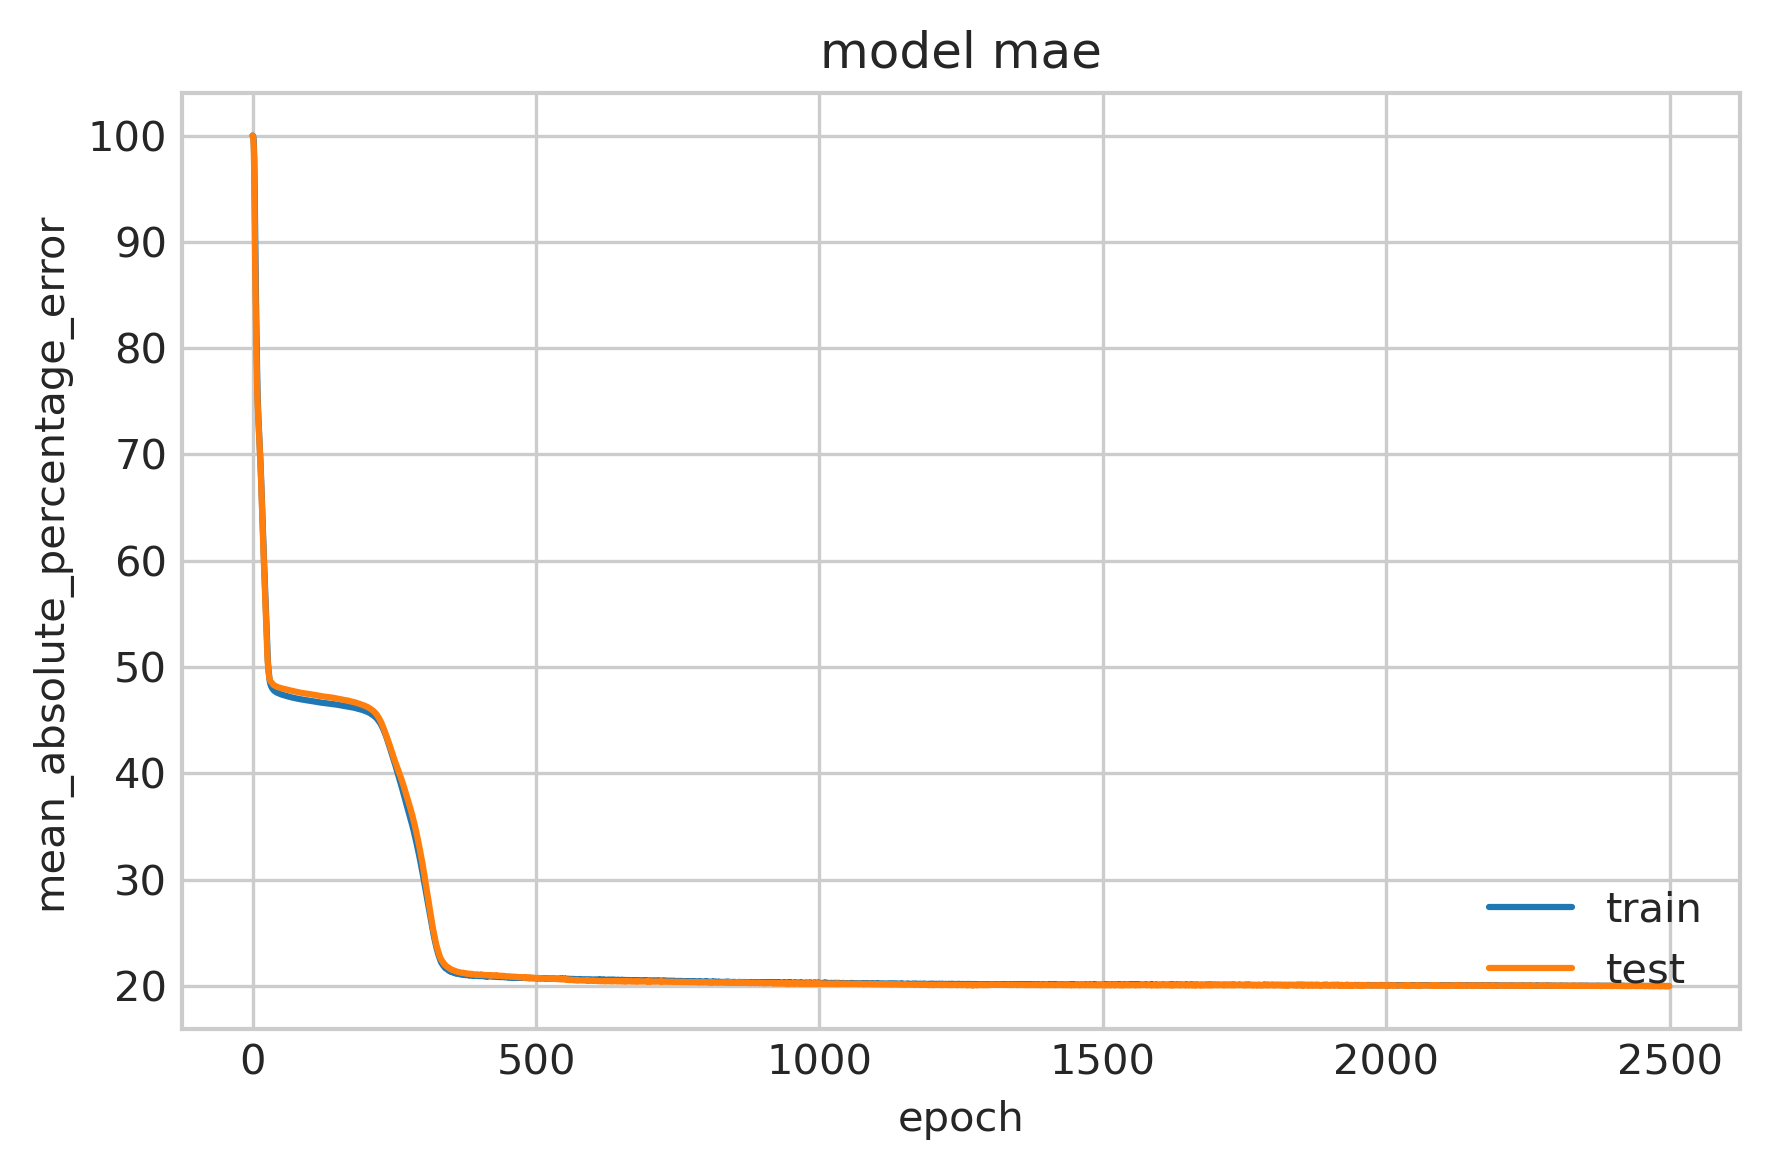

In [270]:
# Fit the model
history = model1.fit(x_train1, y_train1, epochs=2500, validation_data = (x_test1, y_test1), verbose=2, shuffle=False)
plot(history)

In [271]:
keras.backend.clear_session()

### SECTION-3.2: Add new Features from Dataframe for ANN

In [272]:
df_master.columns

Index(['Date', 'Minimum_Temperature', 'Average_Temperature',
       'Maximum_Temperature', 'relative_humidity',
       'Average_windspeed_Beaufort', 'Maximum_windspeed', 'sunshine_duration',
       'average_cloud_cover', 'Rain', 'average_air_preassure',
       'geographic_latitude', 'geographic_longitude', 'height',
       'Capacity_Wind_Offshore', 'Capacity_Wind_Onshore', 'Capacity_PV',
       'Wind_Offshore[MWh]', 'Wind_Onshore_[MWh]', 'Photovoltaics_[MWh]',
       'total_wind_energy[MWh]', 'total_capacity_Wind'],
      dtype='object')

In this section, Neural Network with three additional features is created below inorder to search for less error comparatively above.

Additional features are: Minimum_Temperature, Average_Temperature, Maximum_windspeed

- Total Features are: 8
- Total Taregts are: 2

####  Step 1: Adding features and target to separate dataframe to use it in ANN

In [273]:
# defining name of the features columns
features_2 = ['Minimum_Temperature', 'Average_Temperature', 'Maximum_Temperature', 'relative_humidity',
              'Average_windspeed_Beaufort', 'Maximum_windspeed', 'sunshine_duration', 'average_cloud_cover']

# defining name of target columns
targets_2 = ['Photovoltaics_[MWh]', 'total_wind_energy[MWh]']

x_2 = df_master[features_2]                                    # Creating a dataframe containg Features
y_2 = df_master[targets_2]                                     # Creating a dataframe containg Targets

####  Step 2: Train Test Split

In [274]:
# Spliiting Features and Targets into Training and Testing datasets. Test Data size is 20% of the whole dataset
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_2,y_2, random_state = 1, test_size = 0.2)

In [275]:
# Printing shape of training and testing datasets

print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(1753, 8)
(439, 8)
(1753, 2)
(439, 2)


####  Step 3: Normalizing inputs

In [276]:
# Normalizing the Features x of training dataset

norm2 = tf.keras.layers.experimental.preprocessing.Normalization()
norm2.adapt(x_train2)
x_train2 = norm2(x_train2)

In [277]:
# Normalizing the Features x of testing dataset

norm22 = tf.keras.layers.experimental.preprocessing.Normalization()
norm22.adapt(x_test2)
x_test2 = norm22(x_test2)

####  section 4: Modelling the ANN

In [278]:
# create model
# While creating a Neural Network, Activation function (ReLu) is used in Input and Hidden layers. 
# Because of regression analysis, there is no any activation function (Or Linear activation function) in output layer as we wish to have absolute number after the model performs without any mathematical operations

model2 = Sequential()
model2.add(Dense(8, input_dim=x_train2.shape[1], kernel_initializer='normal', activation='relu'))  # Inpute layer with 5 Neurons
model2.add(Dense(200, input_dim=200, activation='relu'))                                           # Hidden layer 1 with 200 Neurons
model2.add(Dense(100, input_dim=100, activation='relu'))                                           # Hidden Layer 2 with 100 Neurons
model2.add(Dense(2, activation='linear'))                                                          # Output layer with 2 Neurons

# Compile model with Mean Absolute Error as a loss function and Adam as an optimizer
model2.compile(loss='mean_absolute_percentage_error', optimizer='adam')

In [279]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 200)               1800      
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
Total params: 22,174
Trainable params: 22,174
Non-trainable params: 0
_________________________________________________________________


In [280]:
def plot(history):
    # plotting the metrics
    %matplotlib inline 
    plt.rcParams['figure.dpi'] = 300

    fig = plt.figure()
    plt.plot(history.history['loss'])               # Plotting Training error
    plt.plot(history.history['val_loss'])           # Plotting Testing error
    plt.title('model mae')
    plt.ylabel('mean_absolute_percentage_error')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.tight_layout()

    plt.show()

Epoch 1/2500
55/55 - 1s - loss: 99.9965 - val_loss: 99.9841 - 533ms/epoch - 10ms/step
Epoch 2/2500
55/55 - 0s - loss: 99.8584 - val_loss: 99.5756 - 85ms/epoch - 2ms/step
Epoch 3/2500
55/55 - 0s - loss: 98.4562 - val_loss: 96.6671 - 91ms/epoch - 2ms/step
Epoch 4/2500
55/55 - 0s - loss: 93.4501 - val_loss: 90.5195 - 86ms/epoch - 2ms/step
Epoch 5/2500
55/55 - 0s - loss: 89.3876 - val_loss: 88.0026 - 79ms/epoch - 1ms/step
Epoch 6/2500
55/55 - 0s - loss: 87.6674 - val_loss: 86.2288 - 90ms/epoch - 2ms/step
Epoch 7/2500
55/55 - 0s - loss: 85.7000 - val_loss: 83.9703 - 98ms/epoch - 2ms/step
Epoch 8/2500
55/55 - 0s - loss: 83.0426 - val_loss: 81.3935 - 88ms/epoch - 2ms/step
Epoch 9/2500
55/55 - 0s - loss: 79.9638 - val_loss: 78.9976 - 83ms/epoch - 2ms/step
Epoch 10/2500
55/55 - 0s - loss: 77.2997 - val_loss: 77.0315 - 88ms/epoch - 2ms/step
Epoch 11/2500
55/55 - 0s - loss: 75.4868 - val_loss: 75.6688 - 83ms/epoch - 2ms/step
Epoch 12/2500
55/55 - 0s - loss: 74.2963 - val_loss: 74.8119 - 86ms/epoc

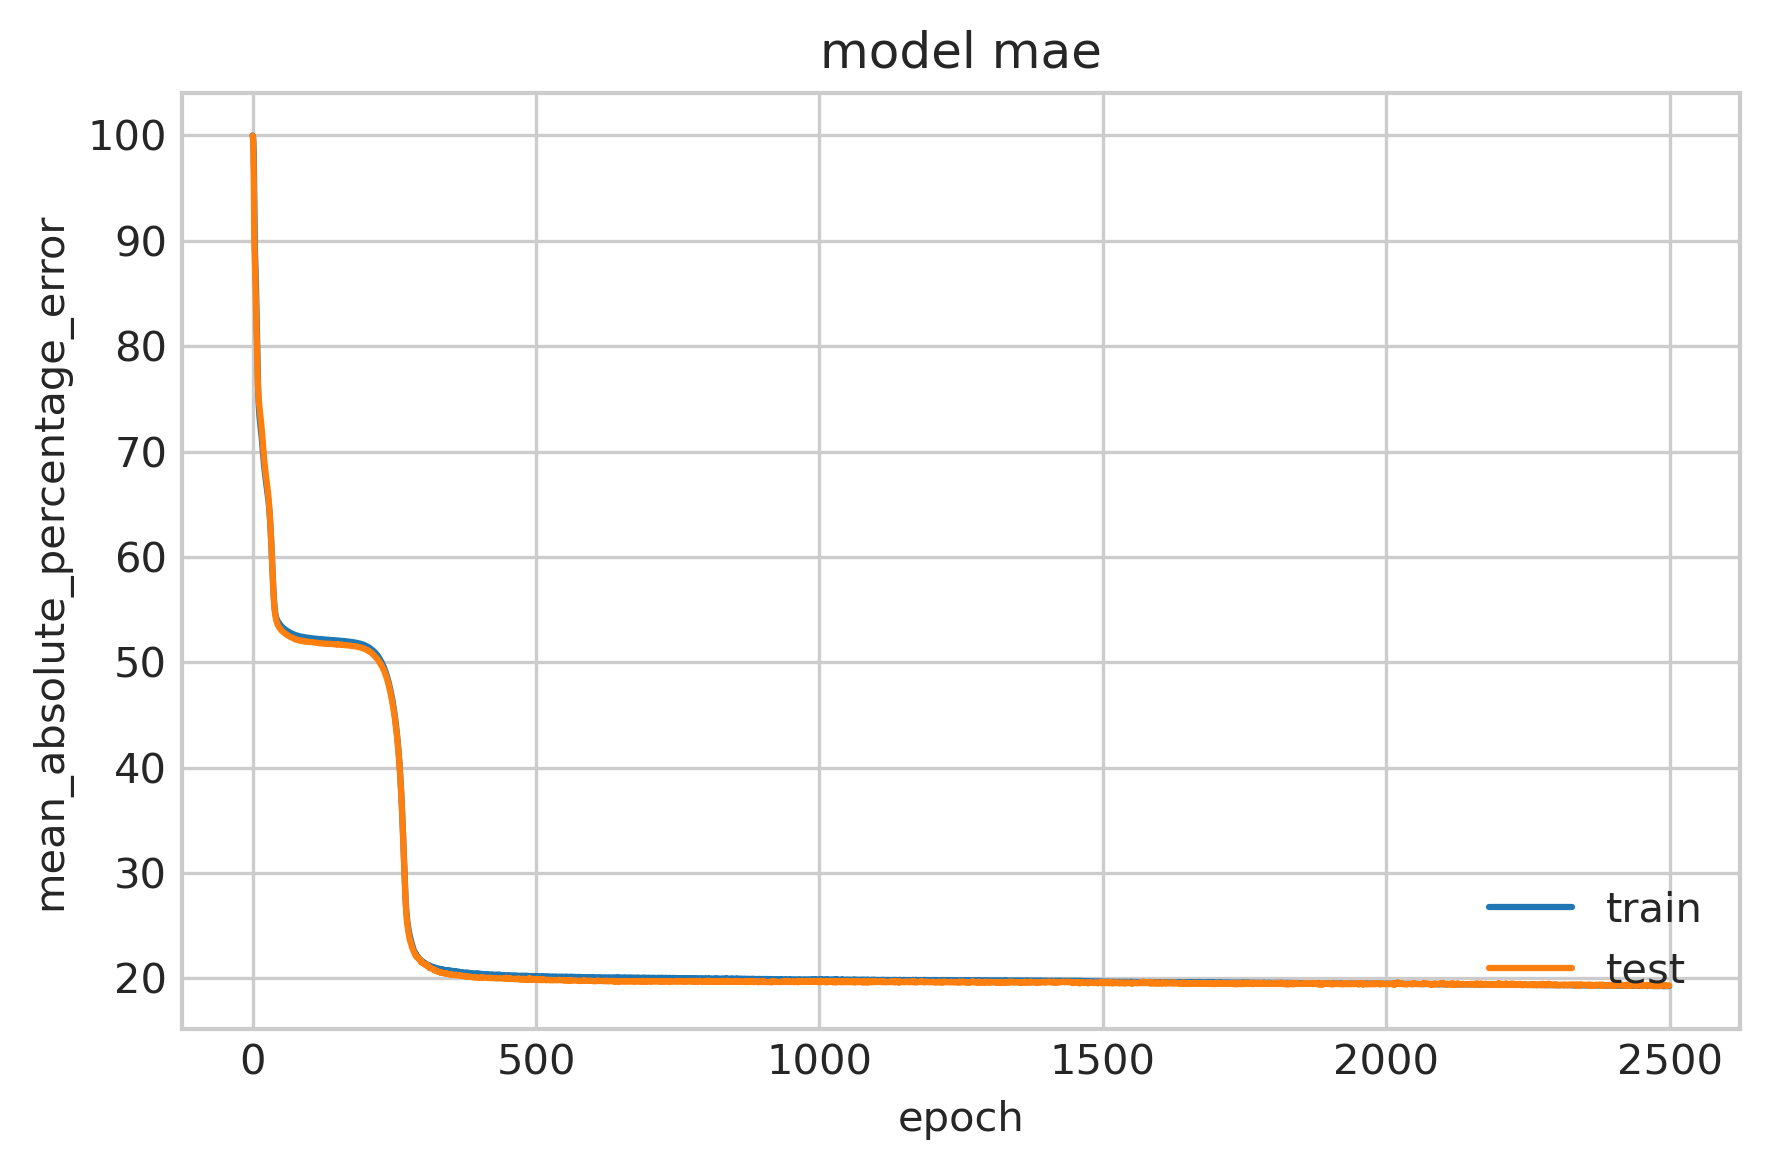

In [281]:
# Fit the model
history = model2.fit(x_train2, y_train2, epochs=2500, validation_data = (x_test2, y_test2), verbose=2, shuffle=False)
plot(history)

In [282]:
keras.backend.clear_session()

### SECTION-3.3: Add new Features from Dataframe for ANN

####  Step 1: Adding features and target to separate dataframe to use it in ANN

In [283]:
df_master.columns

Index(['Date', 'Minimum_Temperature', 'Average_Temperature',
       'Maximum_Temperature', 'relative_humidity',
       'Average_windspeed_Beaufort', 'Maximum_windspeed', 'sunshine_duration',
       'average_cloud_cover', 'Rain', 'average_air_preassure',
       'geographic_latitude', 'geographic_longitude', 'height',
       'Capacity_Wind_Offshore', 'Capacity_Wind_Onshore', 'Capacity_PV',
       'Wind_Offshore[MWh]', 'Wind_Onshore_[MWh]', 'Photovoltaics_[MWh]',
       'total_wind_energy[MWh]', 'total_capacity_Wind'],
      dtype='object')

In this section Two more features are added inorder to get less error comparatively above. 

Added Features are: (1) 'Rain', and (2) 'average_air_preassure'

- Features: 10
- Targets: 2

In [284]:
# Defining Features and Target columns
features_3 = ['Minimum_Temperature', 'Average_Temperature', 'Maximum_Temperature', 'relative_humidity',
              'Average_windspeed_Beaufort', 'Maximum_windspeed', 'sunshine_duration', 'average_cloud_cover', 
              'Rain', 'average_air_preassure']

targets_3 = ['Photovoltaics_[MWh]', 'total_wind_energy[MWh]']

x_3 = df_master[features_3]                                   # Creating dataframe containing features
y_3 = df_master[targets_3]                                    # Creating dataframe containing Targets

####  Stpe 2: Train Test Split

In [285]:
# Splitting Features and Targets into Training and Testing Datasets. Testing dataset is 20% of whole dataset

x_train3, x_test3, y_train3, y_test3 = train_test_split(x_3,y_3, random_state = 1, test_size = 0.2)

In [286]:
# Printing shape of the training and testing dataset of Features and Targets

print(x_train3.shape)
print(x_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(1753, 10)
(439, 10)
(1753, 2)
(439, 2)


####  Step 3: Normalizing inputs

In [287]:
# Normalizing the Features x of training dataset

norm3 = tf.keras.layers.experimental.preprocessing.Normalization()
norm3.adapt(x_train3)
x_train3 = norm3(x_train3)

In [288]:
# Normalizing the Features x of Testing dataset

norm3 = tf.keras.layers.experimental.preprocessing.Normalization()
norm3.adapt(x_test3)
x_test3 = norm3(x_test3)

####  Step 4: Modelling the ANN

In [289]:
# create model
# While creating a Neural Network, Activation function (ReLu) is used in Input and Hidden layers. 
# Because of regression analysis, there is no any activation function (Or Linear activation function) in output layer as we wish to have absolute number after the model performs without any mathematical operations

model3 = Sequential()
model3.add(Dense(10, input_dim=x_train3.shape[1], kernel_initializer='normal', activation='relu'))   # Inpute layer with 5 Neurons
model3.add(Dense(200, input_dim=200, activation='relu'))                                             # Hidden layer 1 with 200 Neurons
model3.add(Dense(100, input_dim=100, activation='relu'))                                             # Hidden Layer 2 with 100 Neurons
model3.add(Dense(2, activation='linear'))                                                            # Output layer with 2 Neurons
 
# Compile model with Mean Absolute Error as a loss function and Adam as an optimizer
model3.compile(loss='mean_absolute_percentage_error', optimizer='adam')

In [290]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 200)               2200      
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
Total params: 22,612
Trainable params: 22,612
Non-trainable params: 0
_________________________________________________________________


In [291]:
def plot(history):
    # plotting the metrics
    %matplotlib inline 
    plt.rcParams['figure.dpi'] = 300

    fig = plt.figure()
    #plt.subplot(2,1,1)
    plt.plot(history.history['loss'])                    # Plotting a Training Error
    plt.plot(history.history['val_loss'])                # Plotting a Testing Error
    plt.title('model mae')
    plt.ylabel('mean_absolute_percentage_error')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.tight_layout()

    plt.show()

Epoch 1/2500
55/55 - 1s - loss: 99.9957 - val_loss: 99.9798 - 811ms/epoch - 15ms/step
Epoch 2/2500
55/55 - 0s - loss: 99.8247 - val_loss: 99.4818 - 87ms/epoch - 2ms/step
Epoch 3/2500
55/55 - 0s - loss: 98.1634 - val_loss: 96.0710 - 107ms/epoch - 2ms/step
Epoch 4/2500
55/55 - 0s - loss: 92.8627 - val_loss: 90.3123 - 85ms/epoch - 2ms/step
Epoch 5/2500
55/55 - 0s - loss: 89.4287 - val_loss: 88.1439 - 87ms/epoch - 2ms/step
Epoch 6/2500
55/55 - 0s - loss: 87.8119 - val_loss: 86.3278 - 78ms/epoch - 1ms/step
Epoch 7/2500
55/55 - 0s - loss: 85.8193 - val_loss: 83.9992 - 79ms/epoch - 1ms/step
Epoch 8/2500
55/55 - 0s - loss: 83.1297 - val_loss: 81.4474 - 85ms/epoch - 2ms/step
Epoch 9/2500
55/55 - 0s - loss: 79.9970 - val_loss: 78.9155 - 82ms/epoch - 1ms/step
Epoch 10/2500
55/55 - 0s - loss: 77.2203 - val_loss: 76.7880 - 80ms/epoch - 1ms/step
Epoch 11/2500
55/55 - 0s - loss: 75.2178 - val_loss: 75.5055 - 81ms/epoch - 1ms/step
Epoch 12/2500
55/55 - 0s - loss: 74.0262 - val_loss: 74.7347 - 85ms/epo

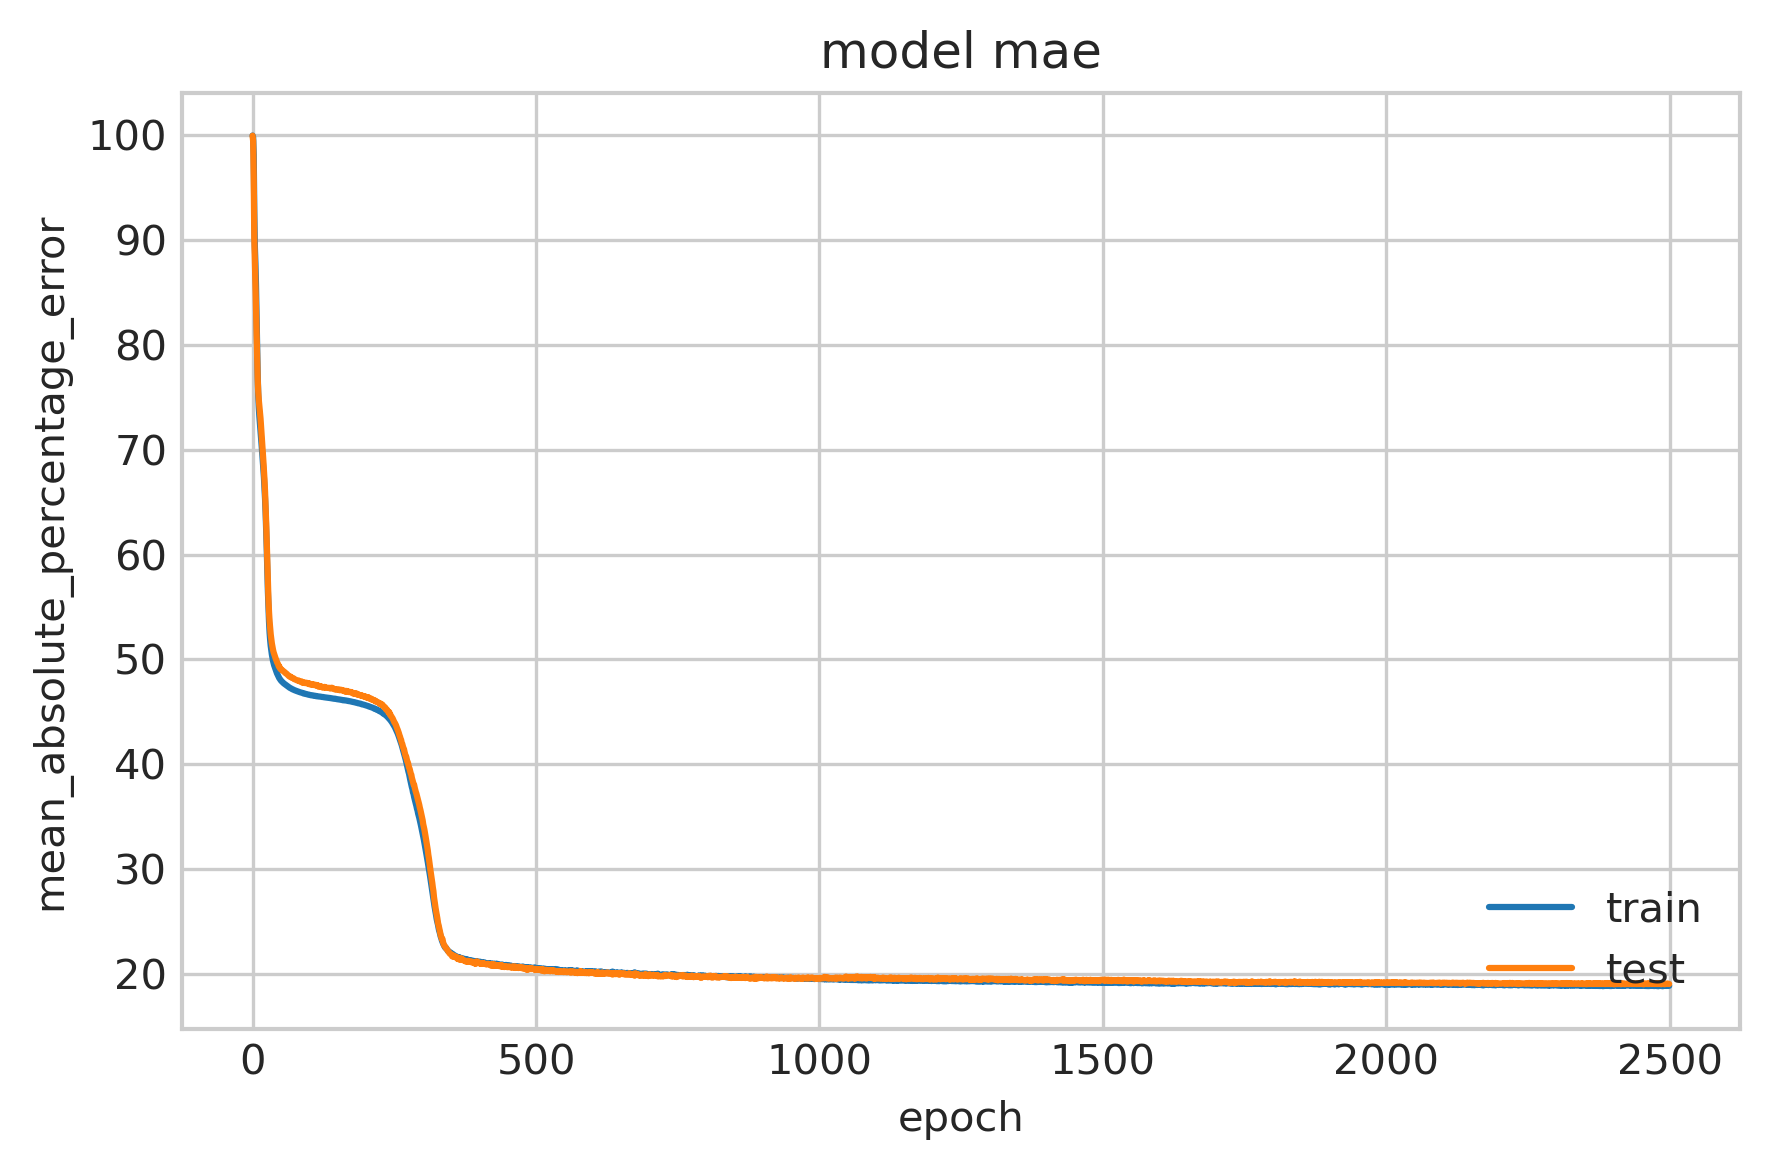

In [292]:
# Fit the model
history = model3.fit(x_train3, y_train3, epochs=2500, validation_data = (x_test3, y_test3), verbose=2, shuffle=False)
plot(history)

In [293]:
keras.backend.clear_session()

### SECTION-3.4: Add new Features from Dataframe for ANN

####  Step 1: Adding features and target to separate dataframe to use it in ANN

In this section Two more features are added inorder to get less error comparatively above. 

Added Features are: (1) 'geographic_latitude', and (2) 'geographic_longitude' (3) 'height'

- Features: 13
- Targets: 2

In [294]:
# Defining Feature columns and Target columns

features_4 = ['Minimum_Temperature', 'Average_Temperature', 'Maximum_Temperature', 'relative_humidity',
              'Average_windspeed_Beaufort', 'Maximum_windspeed', 'sunshine_duration', 'average_cloud_cover', 
              'Rain', 'average_air_preassure', 'geographic_latitude', 'geographic_longitude', 'height']

targets_4 = ['Photovoltaics_[MWh]', 'total_wind_energy[MWh]']

x_4 = df_master[features_4]                                   # Creating dataframe containing features
y_4 = df_master[targets_4]                                    # Creating dataframe containing targets

####  Step 2: Train Test Split

In [295]:
# Splitting Features and Targets into training and testing datasets. Testing Dataset is 20% of whole dataset

x_train4, x_test4, y_train4, y_test4 = train_test_split(x_4,y_4, random_state = 1, test_size = 0.2)

In [296]:
# Printing shape of Traing and testing Features, targets

print(x_train4.shape)
print(x_test4.shape)
print(y_train4.shape)
print(y_test4.shape)

(1753, 13)
(439, 13)
(1753, 2)
(439, 2)


####  Step 3: Normalizing inputs

In [297]:
# Normalizing the Features x of training dataset

norm4 = tf.keras.layers.experimental.preprocessing.Normalization()
norm4.adapt(x_train4)
x_train4 = norm4(x_train4)

In [298]:
# Normalizing the Features x of Testing dataset

norm44 = tf.keras.layers.experimental.preprocessing.Normalization()
norm44.adapt(x_test4)
x_test4 = norm44(x_test4)

####  Step 4: Modelling the ANN

In [299]:
# create model
# While creating a Neural Network, Activation function (ReLu) is used in Input and Hidden layers. 
# Because of regression analysis, there is no any activation function (Or Linear activation function) in output layer as we wish to have absolute number after the model performs without any mathematical operations

model4 = Sequential()
model4.add(Dense(13, input_dim=x_train4.shape[1], kernel_initializer='normal', activation='relu'))   # Input layer with 13 Neurons
model4.add(Dense(200, input_dim=200, activation='relu'))                                             # Hidden layer 1 with 200 Neurons
model4.add(Dense(100, input_dim=100, activation='relu'))                                             # Hidden Layer 2 with 100 Neurons
model4.add(Dense(2, activation='linear'))                                                            # Output layer with 2 Neurons
 
# Compile model with Mean Absolute Error as a loss function and Adam as an optimizer
model4.compile(loss='mean_absolute_percentage_error', optimizer='adam')

In [300]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 200)               2800      
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
Total params: 23,284
Trainable params: 23,284
Non-trainable params: 0
_________________________________________________________________


In [301]:
def plot(history):
    # plotting the metrics
    %matplotlib inline 
    plt.rcParams['figure.dpi'] = 300

    fig = plt.figure()
    #plt.subplot(2,1,1)
    plt.plot(history.history['loss'])             # Plotting traing error
    plt.plot(history.history['val_loss'])         # Plotting testing error
    plt.title('model mae')
    plt.ylabel('mean_absolute_percentage_error')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.tight_layout()

    plt.show()

Epoch 1/2500
55/55 - 1s - loss: 99.9960 - val_loss: 99.9812 - 538ms/epoch - 10ms/step
Epoch 2/2500
55/55 - 0s - loss: 99.8160 - val_loss: 99.4293 - 76ms/epoch - 1ms/step
Epoch 3/2500
55/55 - 0s - loss: 97.8325 - val_loss: 95.1631 - 80ms/epoch - 1ms/step
Epoch 4/2500
55/55 - 0s - loss: 91.7500 - val_loss: 89.1352 - 83ms/epoch - 2ms/step
Epoch 5/2500
55/55 - 0s - loss: 88.1477 - val_loss: 86.3182 - 88ms/epoch - 2ms/step
Epoch 6/2500
55/55 - 0s - loss: 85.3768 - val_loss: 83.3132 - 95ms/epoch - 2ms/step
Epoch 7/2500
55/55 - 0s - loss: 81.7018 - val_loss: 80.1246 - 86ms/epoch - 2ms/step
Epoch 8/2500
55/55 - 0s - loss: 78.1673 - val_loss: 77.4213 - 116ms/epoch - 2ms/step
Epoch 9/2500
55/55 - 0s - loss: 75.8287 - val_loss: 75.9504 - 109ms/epoch - 2ms/step
Epoch 10/2500
55/55 - 0s - loss: 74.4661 - val_loss: 74.9419 - 84ms/epoch - 2ms/step
Epoch 11/2500
55/55 - 0s - loss: 73.5275 - val_loss: 74.2165 - 80ms/epoch - 1ms/step
Epoch 12/2500
55/55 - 0s - loss: 72.7739 - val_loss: 73.4716 - 93ms/ep

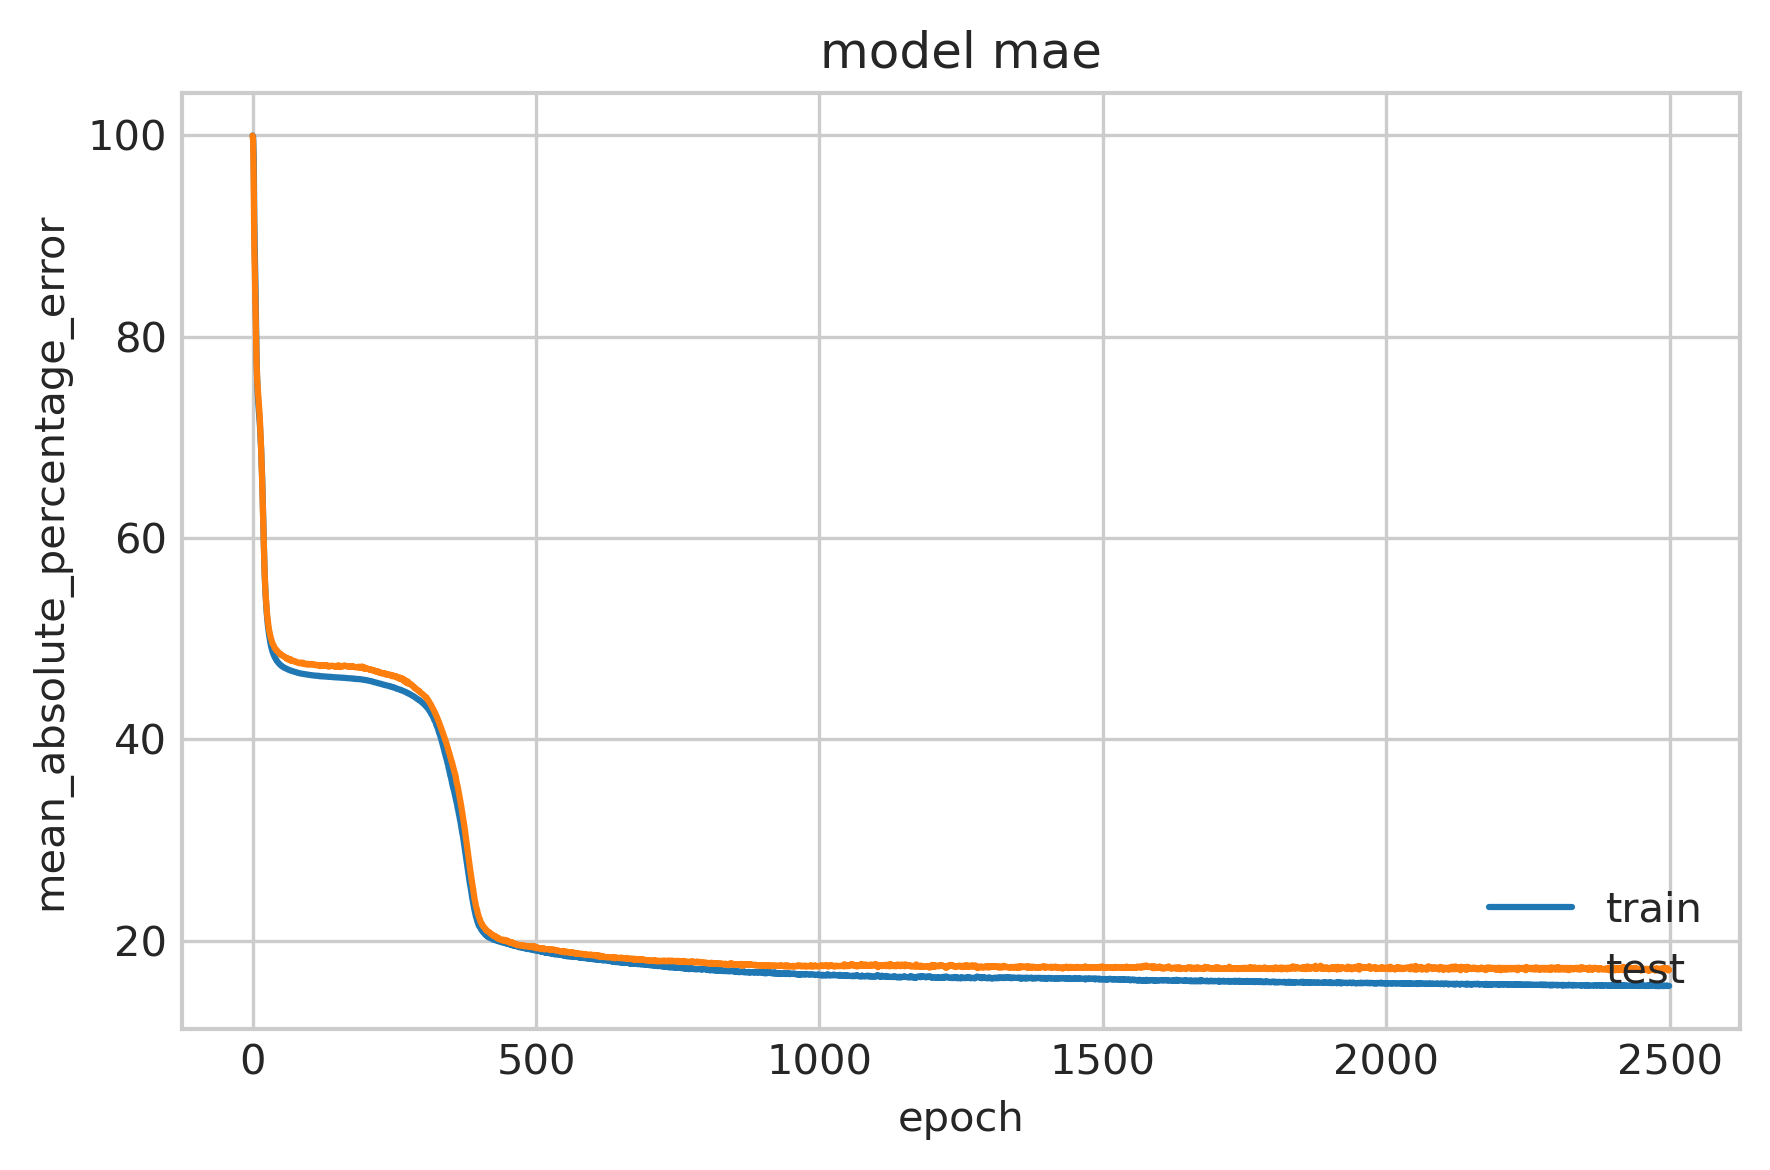

In [302]:
# Fit the model
history = model4.fit(x_train4, y_train4, epochs=2500, validation_data = (x_test4, y_test4), verbose=2, shuffle=False)
plot(history)

In [303]:
keras.backend.clear_session()

### SECTION-3.5: Add new Features from Dataframe for ANN

####  Step 1: Adding features and target to separate dataframe to use it in ANN

In this section Two more features are added inorder to get less error comparatively above. 

Added Features are: (1)'Capacity_Wind_Offshore', (2) 'Capacity_Wind_Onshore', (3) 'Capacity_PV'

- Features: 16
- Targets: 2

In [304]:
# Defining Feature columns and Target columns

features_5 = ['Minimum_Temperature', 'Average_Temperature', 'Maximum_Temperature', 'relative_humidity',
              'Average_windspeed_Beaufort', 'Maximum_windspeed', 'sunshine_duration', 'average_cloud_cover', 
              'geographic_latitude', 'geographic_longitude', 'height','Rain', 'average_air_preassure',
              'Capacity_Wind_Offshore', 'Capacity_Wind_Onshore', 'Capacity_PV']

targets_5 = ['Photovoltaics_[MWh]', 'total_wind_energy[MWh]']

x_5 = df_master[features_5]                                     # Creating Dataframe containing Features
y_5 = df_master[targets_5]                                      # Creating Dataframe containing Targets

####  Step 2: Train Test Split

In [305]:
# Splitting Feature and Target Datasets into Training and Testing Datasets. Testing Dataset is 20% of the whole dataset

x_train5, x_test5, y_train5, y_test5 = train_test_split(x_5,y_5, random_state = 1, test_size = 0.2)

In [306]:
# Printing shape of the traing and testing datasets of Features and Targets

print(x_train5.shape)
print(x_test5.shape)
print(y_train5.shape)
print(y_test5.shape)

(1753, 16)
(439, 16)
(1753, 2)
(439, 2)


####  section 3: Normalizing inputs

In [307]:
# Normalizing the Features x of training dataset

norm5 = tf.keras.layers.experimental.preprocessing.Normalization()
norm5.adapt(x_train5)
x_train5 = norm5(x_train5)

In [308]:
# Normalizing the Features x of Testing dataset

norm55 = tf.keras.layers.experimental.preprocessing.Normalization()
norm55.adapt(x_test5)
x_test5 = norm55(x_test5)

####  section 4: Modelling the ANN

In [309]:
# create model
# While creating a Neural Network, Activation function (ReLu) is used in Input and Hidden layers. 
# Because of regression analysis, there is no any activation function (Or Linear activation function) in output layer as we wish to have absolute number after the model performs without any mathematical operations

model5 = Sequential()
model5.add(Dense(16, input_dim=x_train5.shape[1], kernel_initializer='normal', activation='relu'))   # Inpute layer with 15 Neurons
model5.add(Dense(200, input_dim=200, activation='relu'))                                             # Hidden layer 1 with 200 Neurons
model5.add(Dense(100, input_dim=100, activation='relu'))                                             # Hidden Layer 2 with 100 Neurons
model5.add(Dense(2, activation='linear'))                                                            # Output layer with 2 Neurons

# Compile model with Mean Absolute Error as a loss function and Adam as an optimizer
model5.compile(loss='mean_absolute_percentage_error', optimizer='adam')

In [310]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 200)               3400      
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
Total params: 23,974
Trainable params: 23,974
Non-trainable params: 0
_________________________________________________________________


In [311]:
def plot(history):
    # plotting the metrics
    %matplotlib inline 
    plt.rcParams['figure.dpi'] = 300

    fig = plt.figure()
    plt.plot(history.history['loss'])           # Plotting Traing Error
    plt.plot(history.history['val_loss'])       # Plotting testing error
    plt.title('model mae')
    plt.ylabel('mean_absolute_percentage_error')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.tight_layout()

    plt.show()

Epoch 1/2500
55/55 - 1s - loss: 99.9936 - val_loss: 99.9689 - 530ms/epoch - 10ms/step
Epoch 2/2500
55/55 - 0s - loss: 99.7124 - val_loss: 99.1030 - 89ms/epoch - 2ms/step
Epoch 3/2500
55/55 - 0s - loss: 96.7974 - val_loss: 93.1549 - 94ms/epoch - 2ms/step
Epoch 4/2500
55/55 - 0s - loss: 90.5383 - val_loss: 88.2002 - 91ms/epoch - 2ms/step
Epoch 5/2500
55/55 - 0s - loss: 87.2411 - val_loss: 85.2347 - 93ms/epoch - 2ms/step
Epoch 6/2500
55/55 - 0s - loss: 83.8027 - val_loss: 81.4599 - 78ms/epoch - 1ms/step
Epoch 7/2500
55/55 - 0s - loss: 79.3845 - val_loss: 77.4923 - 83ms/epoch - 2ms/step
Epoch 8/2500
55/55 - 0s - loss: 75.1796 - val_loss: 74.1698 - 79ms/epoch - 1ms/step
Epoch 9/2500
55/55 - 0s - loss: 72.5247 - val_loss: 72.5591 - 86ms/epoch - 2ms/step
Epoch 10/2500
55/55 - 0s - loss: 70.9506 - val_loss: 71.4333 - 76ms/epoch - 1ms/step
Epoch 11/2500
55/55 - 0s - loss: 69.8487 - val_loss: 70.6121 - 80ms/epoch - 1ms/step
Epoch 12/2500
55/55 - 0s - loss: 68.9869 - val_loss: 69.8629 - 87ms/epoc

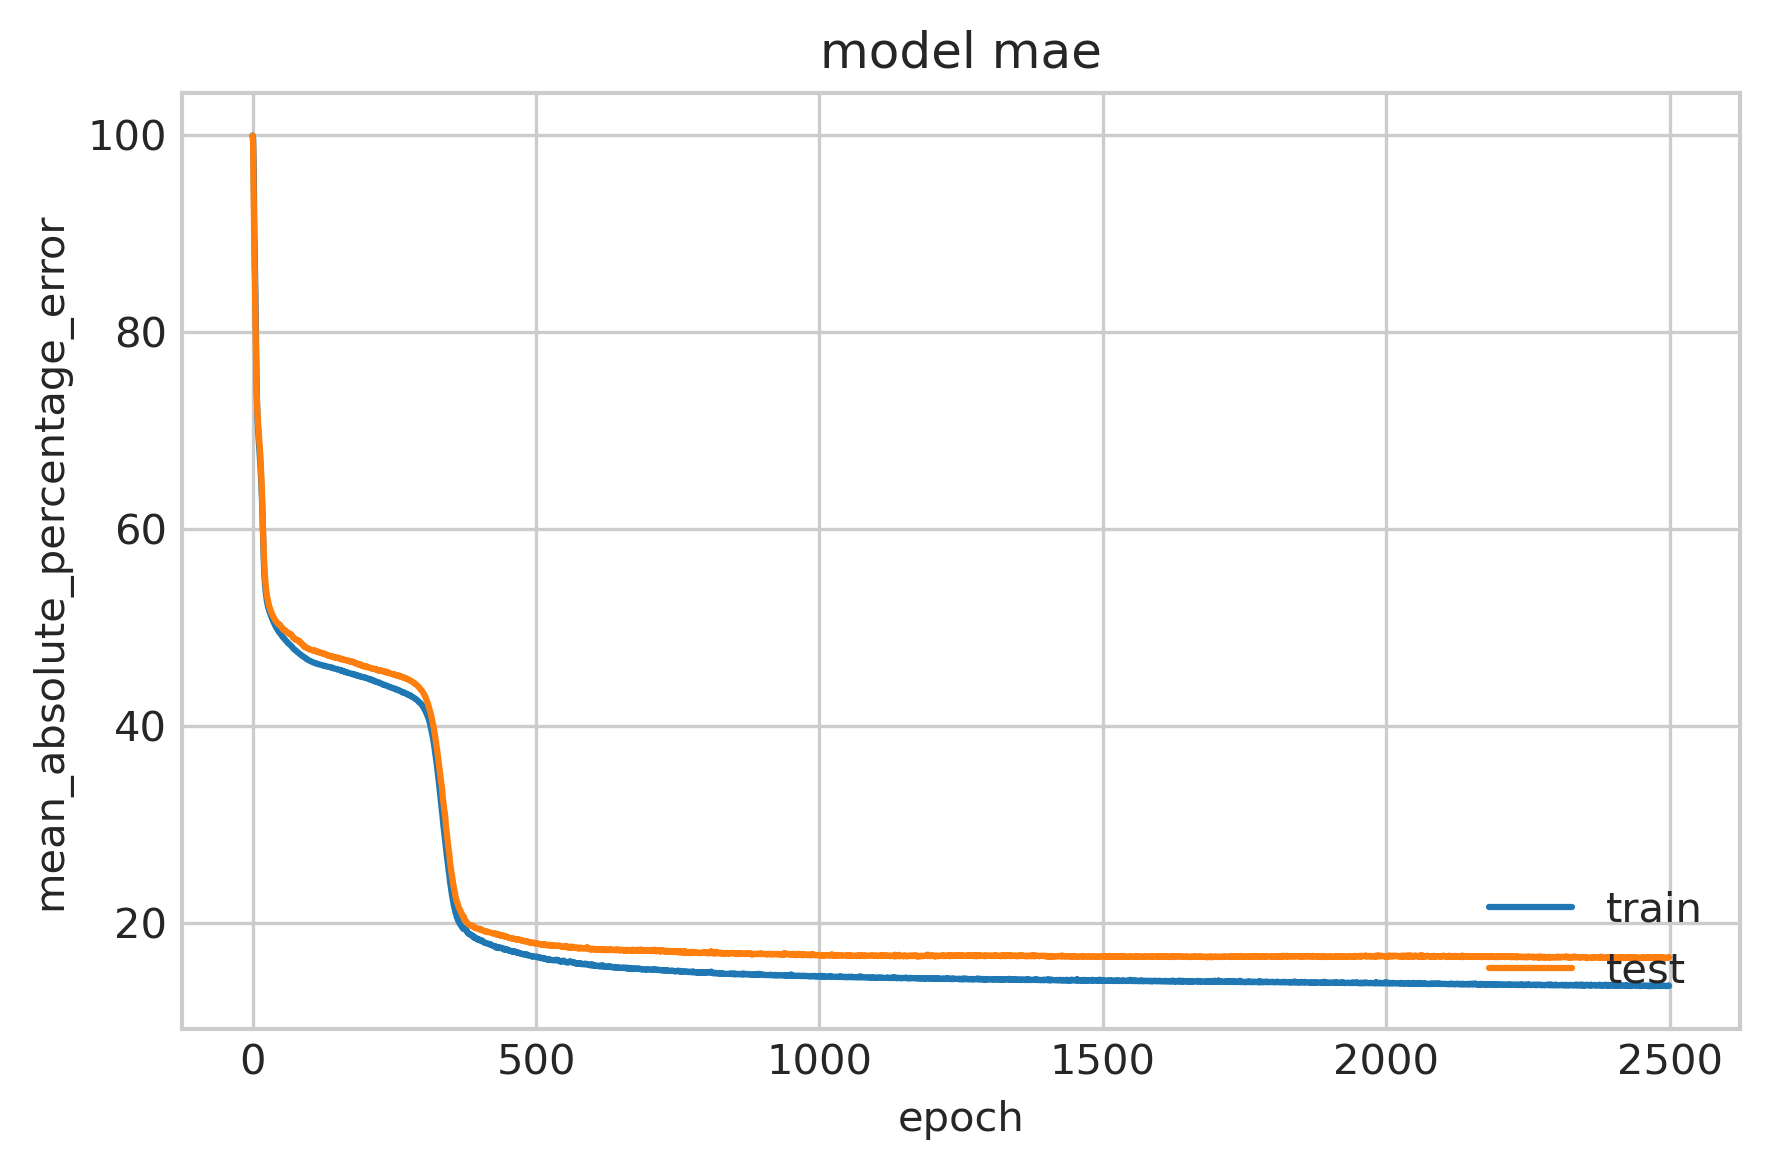

In [312]:
# Fit the model
history = model5.fit(x_train5, y_train5, epochs=2500, validation_data = (x_test5, y_test5), verbose=2, shuffle=False)
plot(history)

In [313]:
keras.backend.clear_session()

### SECTION-4: Prediction of values on trained ANN model

In below section evaluation of the model is done based the results we got in Trail 5 (Latest Neual Network).

In [314]:
#prediction of the values by giving test dataset of Features

predictions = model5.predict(x_test5)
predictions = np.ravel(predictions)                    # converting prediction results to numpy 1D array
predictions = predictions.reshape(439, 2)              # converting prediction results to numpy 2D array

In [315]:
# coverting numpy array to DataFrame and Giving a names to columns

predictions = pd.DataFrame(predictions, columns=['predicted_photovoltaics_[MWh]', 'predicted_total_wind_energy[MWh]'])
predictions

predicted_photovoltaics_[MWh]  predicted_total_wind_energy[MWh]
0                    155461.140625                      69756.976562
1                    122065.218750                     204766.953125
2                    174192.734375                     271642.687500
3                     22297.937500                     152366.187500
4                    224408.062500                     254187.140625
..                             ...                               ...
434                   77248.851562                     387537.625000
435                   42403.597656                     415738.218750
436                   41476.933594                      66290.453125
437                   28504.351562                     281027.281250
438                  178339.671875                     149961.859375

[439 rows x 2 columns]

'y_test5' has true values of of weather data 'x_test5' on which we predicted energy values. We will compare the true values and predicted values.

In [316]:
# resetting index of true values 
y_test5 = y_test5.reset_index()

In [317]:
y_test5

index  Photovoltaics_[MWh]  total_wind_energy[MWh]
0      560               149487                   77386
1     2107               126482                  153543
2     1281               190640                  300261
3     1793                26801                  170892
4     1722               205164                  254994
..     ...                  ...                     ...
434   2126                71838                  503337
435     37                38081                  512750
436    282                68383                   72407
437    366                35294                  310175
438    586               169041                  222758

[439 rows x 3 columns]

In [318]:
df_true_pred = pd.DataFrame()                    # initialization of new dataframe which stores true and predicted values of energy values

df_true_pred['Photovoltaics_[MWh]']              = y_test5['Photovoltaics_[MWh]']
df_true_pred['predicted_photovoltaics_[MWh]']    = predictions['predicted_photovoltaics_[MWh]']
df_true_pred['total_wind_energy[MWh]']           = y_test5['total_wind_energy[MWh]']
df_true_pred['predicted_total_wind_energy[MWh]'] = predictions['predicted_total_wind_energy[MWh]']
df_true_pred

Photovoltaics_[MWh]  predicted_photovoltaics_[MWh]  \
0                 149487                  155461.140625   
1                 126482                  122065.218750   
2                 190640                  174192.734375   
3                  26801                   22297.937500   
4                 205164                  224408.062500   
..                   ...                            ...   
434                71838                   77248.851562   
435                38081                   42403.597656   
436                68383                   41476.933594   
437                35294                   28504.351562   
438               169041                  178339.671875   

     total_wind_energy[MWh]  predicted_total_wind_energy[MWh]  
0                     77386                      69756.976562  
1                    153543                     204766.953125  
2                    300261                     271642.687500  
3                    170892                     152366.187500  
4                    254994                     254187.140625  
..                      ...                               ...  
434                  503337                     387537.625000  
435                  512750                     415738.218750  
436                   72407                      66290.453125  
437                  310175                     281027.281250  
438                  222758                     149961.859375  

[439 rows x 4 columns]

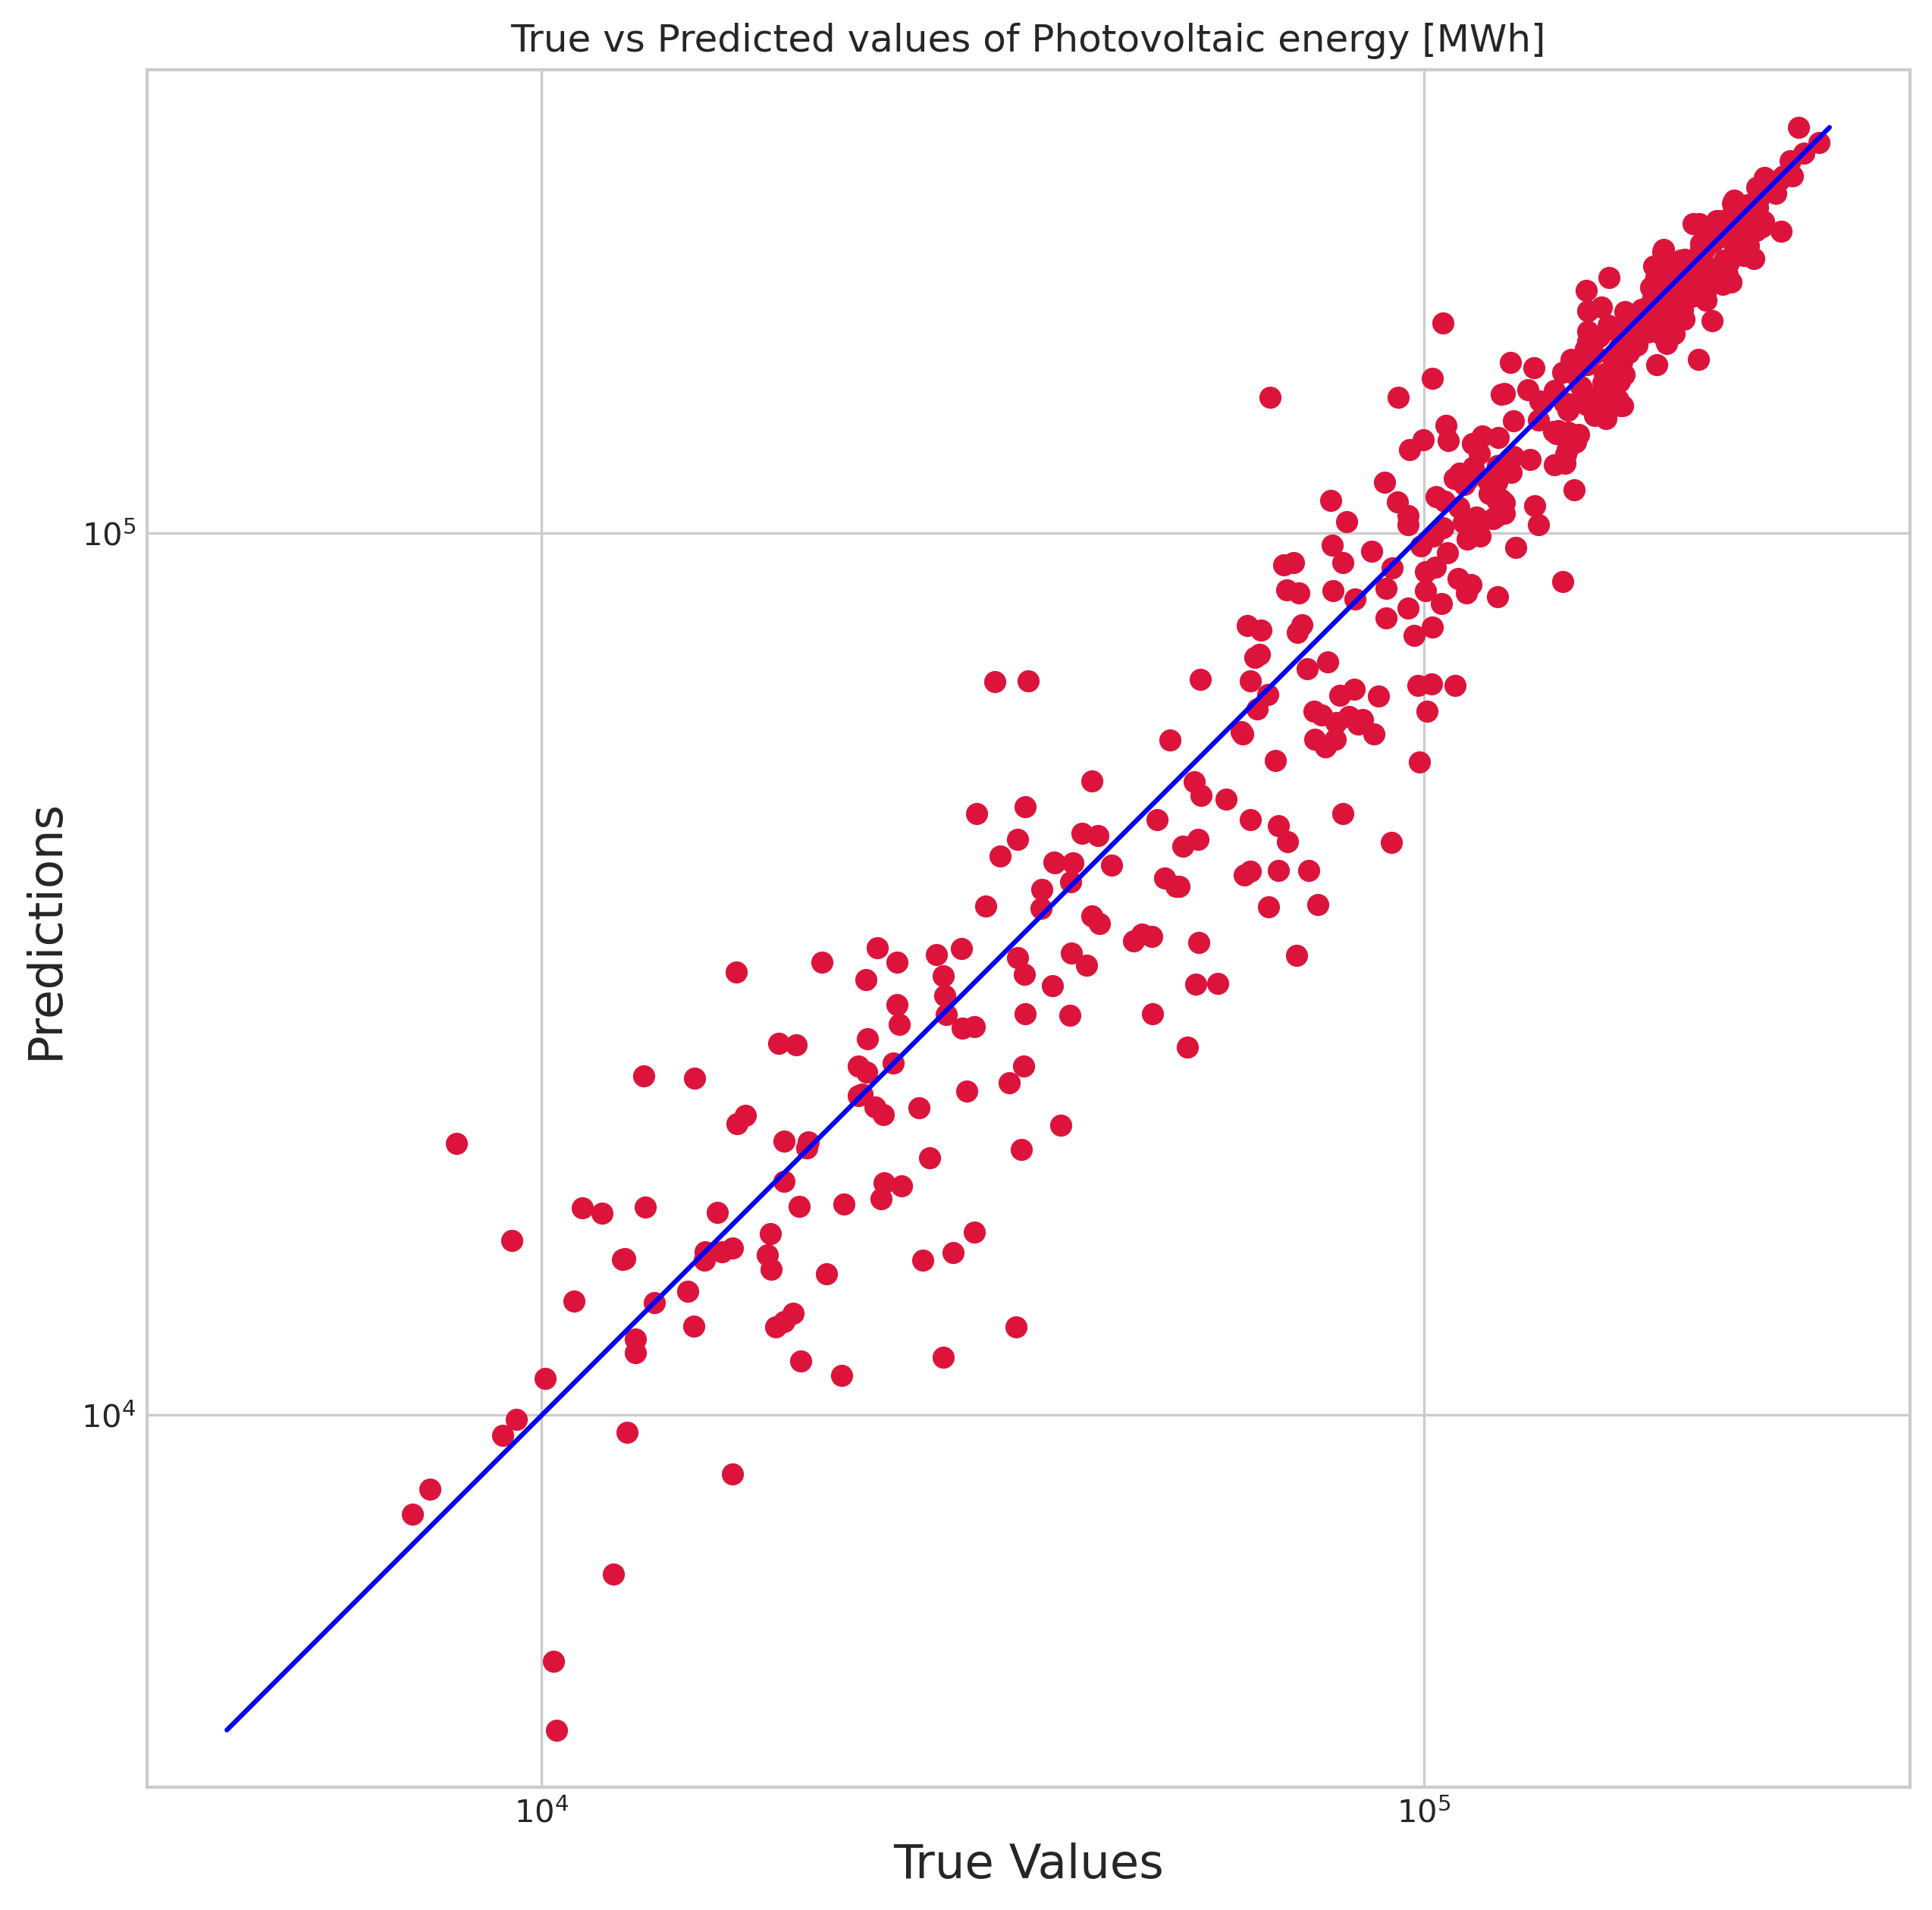

In [321]:
# Plotting scattered plot of Predicted values and True Values of Photovoltaic enegry

plt.figure(figsize=(10,10))
plt.scatter(df_true_pred['Photovoltaics_[MWh]'], df_true_pred['predicted_photovoltaics_[MWh]'], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(df_true_pred['predicted_photovoltaics_[MWh]']), max(df_true_pred['Photovoltaics_[MWh]']))
p2 = min(min(df_true_pred['predicted_photovoltaics_[MWh]']), min(df_true_pred['Photovoltaics_[MWh]']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("True vs Predicted values of Photovoltaic energy [MWh]")
plt.axis('equal')
plt.show()

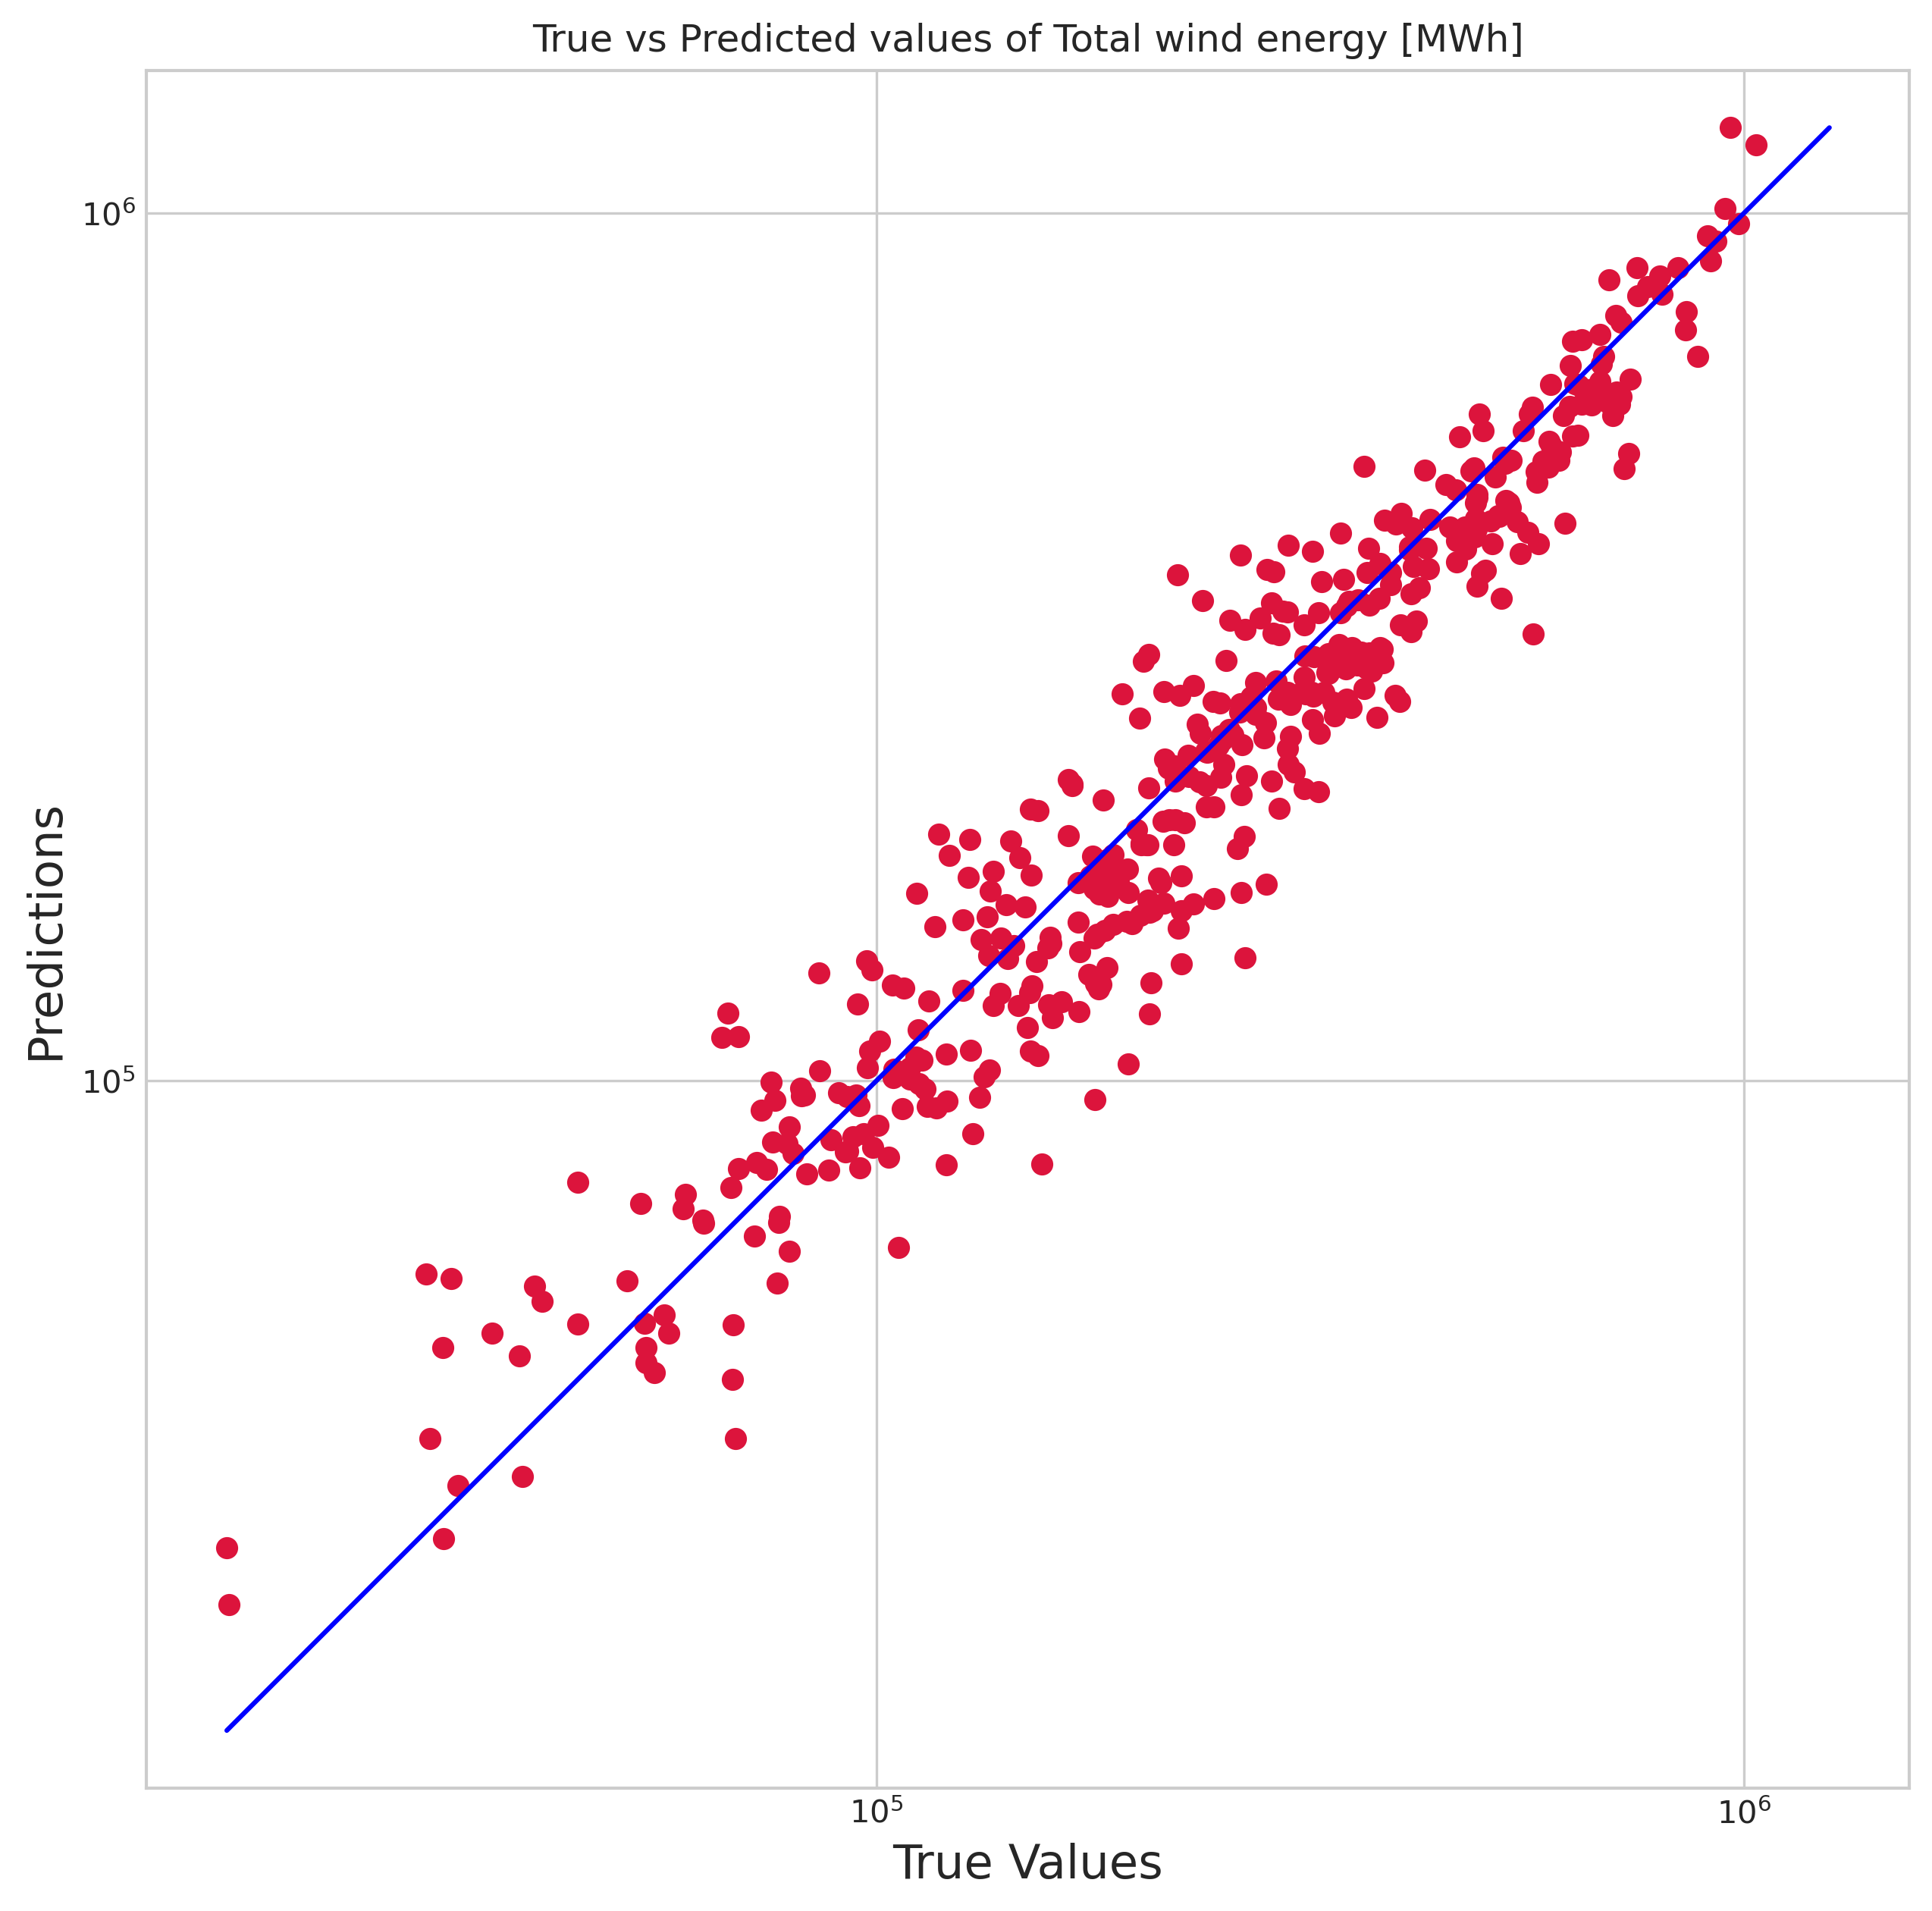

In [322]:
# Plotting scattered plot of Predicted values and True Values of Total wind energy enegry

plt.figure(figsize=(10,10))
plt.scatter(df_true_pred['total_wind_energy[MWh]'], df_true_pred['predicted_total_wind_energy[MWh]'], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(df_true_pred['predicted_total_wind_energy[MWh]']), max(df_true_pred['total_wind_energy[MWh]']))
p2 = min(min(df_true_pred['predicted_total_wind_energy[MWh]']), min(df_true_pred['total_wind_energy[MWh]']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("True vs Predicted values of Total wind energy [MWh]")
plt.axis('equal')
plt.show()

- As it can be seen from Neural Network results, the lowest error (Mean Absolute Percentage Error) occured 16.50% by using 16 number of Features. The same accuracy was not acheived while using less than 16 number of features or mostly correlated feature (feature with morethan 0.80 correlation value). Hence, it can be said, that becuause of the Non linearity presented in this dataframe, Neural Network will predict the values with higher accuracy when more features are given to it. 


- The Scattered plots above clearly shows that, the predicted values are more likely same as the true values with having 16.5% average error as all scattered points are arranged on the straight line.

## Summary (10 Points)

Is this model usable for predicting the amount of generated renewable energy based on weather data?

### (1) Summary of File: 'energy_capacity.csv'

- This file has data of capacity values of various energy productions. From this dataframe, only 'Wind Offshore[MW]', 'Wind Onshore[MW]', 'Photovoltaics[MW]' columns are extracted for further process as ANN predicts only renewable enegries. 

- This file does not have any missing values. Therefore, there is no any process of filling any missing data.

- Heatmap of this dataframe clearly shows us that capacities of all three types of energies are increased as Year passed by. Wind Onshore energy has Highest energy production capacities among all three energies whereas Wind Offshore has least production capacities. 

- In the last step, the year value is extracted from the 'Date' column which is used lateron to merge the capacities values into the Energy Production Dataframe.

### (2) Summary of File:'energy_produced.csv'

- This file firstly converted into the dataframe followed by printing data of inside. 


- Removed unnecessary columns as we are predicting renewable energies. Therefore, all columns otherthan "Date", "Time", "Wind Offshore[MW]", "Wind Onshore[MW]", "Photovoltaics[MW]" columns are removed from dataframe and proceed further. 


- Checked missing values in the Dataframe. However, from the Figure and data obtained, it can be clearly seen that there is no any single missing values. 


- Extracted a 'Hour' from the time in 'Time' column for ease of further calculations. 


- Since this assignment aims to predict the energy outcomes of a Day then firstly 4 different Energy data of all respective hours (generated in every 15 minutes) are added inorder to get the Energy outcome in [MWh] followed by addition of energy produce data in every hour. That's how the energy produce in every hour during the period between 01.01.2016 and 31.12.2021 is obtained. 


- 'Year' value is extracted 'Date' column and added 'Year' value in a new column inorder to merge 'energy_produced.csv' and 'energy_capacity.csv' to add the capacities value against respective Energy values and Dates.


- Merge the Dataframe 'energy_produced.csv' and 'energy_capacity.csv' as 'Year' column as common column. That's how Capacities of every energies in respective years is added against every Date and Energy production data.


- This dataframe is finally having 2192 Rows and 8 columns

### (3) Summary of File:'Weather stations.csv'

- Data is converted into a dataframe and read the dataframe in the cell.


- Removed unncessary data from the dataframe. 'Location' and 'Operator'is dropped from the dataframe as these data are not really necessary for our Neural Network as Features


- There is no missing values in this dataframe 

### (4) Summary of File:'Weather.csv'

- Data is converted into a dataframe and read the dataframe in the cell.


- Merged two dataframes 'df_data_weather' (which has weather data) and 'df_data_wea_stations' (Which has weather stations data) by having 'Station ID' as a common columns between two dataframes.


- This datafram was having many missing values. Heighest number of missing values (12242) are found in 'average cloud cover' column for which it is decided to fill its missing values with 'median' value of the whole columns inorder to prevent 'mean' value of the data shifts towards zero. 


- Other missing values are comparatively less than the 'avaerage cloud cover' and each number of missing values is less than 8% of the whole data (164040 rows × 15 columns). Therefore, it is decided that replacing those values with 'bfill (backward fill)' will not occur any bad effects on the prediction results of ANN. 'bfill has given less error after running ANN than error using '0' to replace values.


- Took 'mean' value of all available weather properties of all available stations for each day. Each day now has 'mean' value of the all available weather properties (13 columns).


- This dataframe now also has 2192 rows × 14 columns which can be merged with 'energy_produced.csv' (2192 rows X 8 columns)

### (5) Summary of Master dataframe 'df_master'

- This dataframe is created inorder to make a combined single dataframe which can be fed into Neural Network for the energy prediction.


- Every single column from 'df_data_weather_mean' (Weather data) and 'df_data_ene_perday_final_capacity' (Energy produced data) is added to 'df_master' to make it combined dataframe


- Correlation plot is plotted and it can be seen that, every energies has correlation with different Features in Weather data as correlation values (between 0 and 1) as stated below, 
  - **Photovoltaics Energy:** 'sunshine_duration' (0.91), 'Maximum_Tempearture' (0.79), 'average_cloud_cover' (-0.84) and relative humidity (-0.68) 
  
  - **Wind_Onshore:** 'average_windspeed' (0.94), 'Maximum_windspeed' (0.85), sunshine_duration (-0.38)
  
  - **Wind_Offshore:** 'average_windspeed' (0.6), 'Maximum_windspeed' (0.49), sunshine_duration (-0.31)

### (6) Summary of Artificial Neural Network

- Since we are aiming to predict Energy production data of a day, it is not wrong to add the energy of "Wind_Offshore[MWh]" and energy of "Wind_Onshore_[MWh]". Therefore addition of two wind energies is done and made a new column of 'total wind energy[MWh]'. Similarly capacities of both energies are added to make a new column 'total_capacity_Wind'.


- Correlation plot is again plotted and now we can see the correlation target varibale total wind energy with other independent variables. Total Wind energy has a heighest correlation with Average wind speed (0.92) followed by Maximum windspeed (0.83).


- While developing Artificial Neural Network model, Machine Learning Frameworks like Keras and TensorFlow is used. 


- To split the traing and testing datasets, a function of Sci-kit learn 'train_test_split' is used. 


- Inputs are normalized as dataframe has very diverse data and have big range of values. Only Features are normalized inorder to make features values between certain range to give every value a same importance. 


- **Modelling of ANN: Trial 1**
    - Total number of Features: 5
    - Total number of Targets: 2
    - Input layer nodes: 5
    - Hidden layer 1 nodes: 200
    - Hidden layer 2 nodes: 100
    - Output layer nodes: 2
    - activation function: Relu in all layer (except in output layer)
    - loss: mean absolute percentage error
    - Optimizer: Adam
    - **Obtained MAPE value: 19.97**
    
    
- **Modelling of ANN: Trial 2**
    - Total number of Features: 8
    - Total number of Targets: 2
    - Input layer nodes: 5
    - Hidden layer 1 nodes: 200
    - Hidden layer 2 nodes: 100
    - Output layer nodes: 2
    - activation function: Relu in all layer (except in output layer)
    - loss: mean absolute percentage error
    - Optimizer: Adam
    - **Obtained MAPE value: 19.32**
    
    
- **Modelling of ANN: Trial 3**
    - Total number of Features: 10
    - Total number of Targets: 2
    - Input layer nodes: 5
    - Hidden layer 1 nodes: 200
    - Hidden layer 2 nodes: 100
    - Output layer nodes: 2
    - activation function: Relu in all layer (except in output layer)
    - loss: mean absolute percentage error
    - Optimizer: Adam
    - **Obtained MAPE value: 19.02**
    

- **Modelling of ANN: Trial 4**
    - Total number of Features: 10
    - Total number of Targets: 2
    - Input layer nodes: 5
    - Hidden layer 1 nodes: 200
    - Hidden layer 2 nodes: 100
    - Output layer nodes: 2
    - activation function: Relu in all layer (except in output layer)
    - loss: mean absolute percentage error
    - Optimizer: Adam
    - **Obtained MAPE value: 17.09**
    
    
- **Modelling of ANN: Trial 5**
    - Total number of Features: 10
    - Total number of Targets: 2
    - Input layer nodes: 5
    - Hidden layer 1 nodes: 200
    - Hidden layer 2 nodes: 100
    - Output layer nodes: 2
    - activation function: Relu in all layer (except in output layer)
    - loss: mean absolute percentage error
    - Optimizer: Adam
    - **Obtained MAPE value: 16.50**

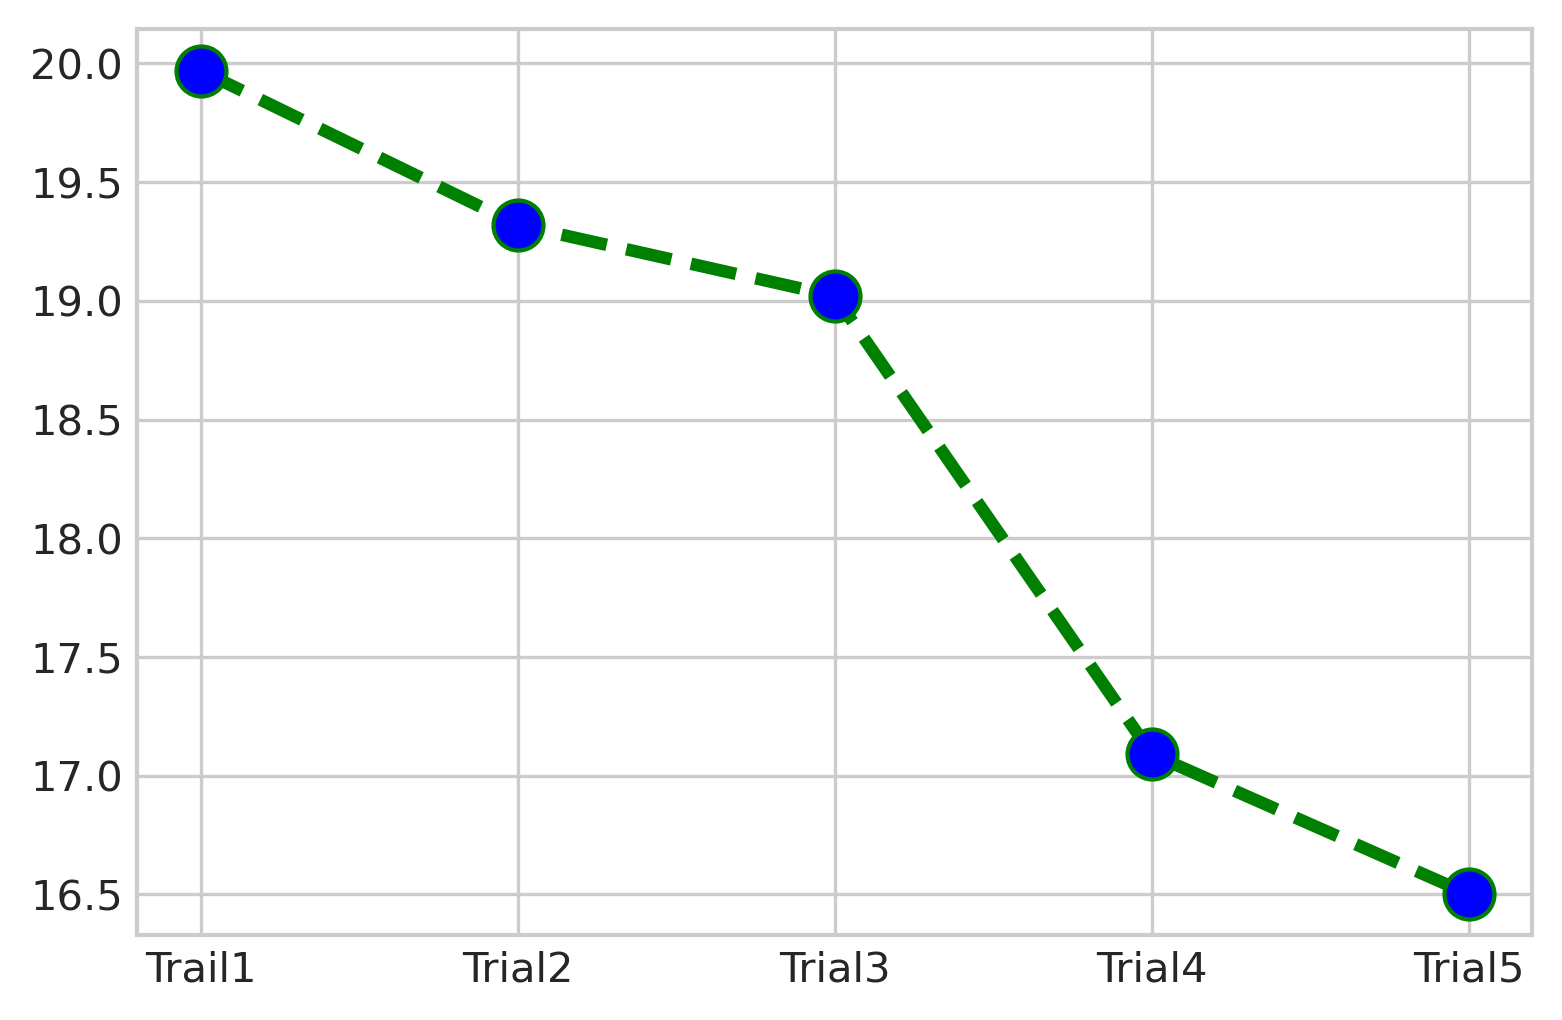

In [324]:
import matplotlib.pyplot as plt 
x = ['Trail1', 'Trial2', 'Trial3', 'Trial4', 'Trial5']
y = [19.97, 19.32, 19.02, 17.09, 16.50]
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)

### (7) Concluded points from this ANN

- It can be concluded that, ANN achieves the low error value after adding more features as it can be seen from above plot. ANN has predicted minimum error by using 16 features from the dataframe. 


- The weather data and weather stations data has significant meaning to generate a meaningful features to predict the targets more accurately. 


- There are some outliers datapoints in the Weather data file. However, this is real world data and based on those data only we are forecasting energy generation, therefore, it is not meaningful to remove those outliers from the datafile even if it gives not good results.the data which has given in a raw file is useful to make forcasting of the energy values.


- As nonlinearity is presented in this database, prediction with good accuracy or minimum error cannot be done by using only most correlated features. 


- Hence, it is fair to say that, this ANN model is useful for the prediction of energy generation by using more features. However, it can be improved in someway, but it will still have around 12 to 13% error between true values and prediction values. Therefore, the person should take care about the error and must consider it while giving the predicted data to other person. Nevertheless, person can make a good money if he predicts the energy values using this model and dataframe.